 Author: Dharaneesh Subramani, Alfred Murula, Sai Sadhankumar

# MSBA CAPSTONE PROJECT_SWIRE COCA COLA 

## Business Problem Statement

The problem is that Swire Coca-Cola needs to improve their ability to predict the popularity, longevity, and total 3-year sales volume of new customers in order to make informed decisions about pricing and funding for these businesses.

A solution to this problem would allow Swire Coca-Cola to better evaluate the potential profitability of new restaurant customers, which would in turn help the company make more effective decisions about pricing and funding for these businesses. This could result in a greater return on investment for the company, as well as more loyal and valuable customers.

Stakeholders will judge the success of the project based on the accuracy of the predictions made by the solution and the effectiveness of the dashboard in providing insights and visualization of the predictions. Specifically, they will look at the percentage of predictions that are accurate, as well as the overall performance of the solution in terms of its ability to predict popularity, longevity, and total 3-year sales volume.

The general character of the analytics approach to solving this problem would likely involve the use of historical data to train a machine learning model. This model would then be used to make predictions about new restaurant customers based on the characteristics of the historical data. The dashboard will be designed to provide an easy-to-use interface for stakeholders to access the predictions and explore the insights.

The scope of the project will include the development of a machine learning model to predict popularity, longevity, and total 3-year sales volume of new restaurant customers and a dashboard to provide insights and visualization of the predictions.

The project will be executed by a team of four data analysts within the MSBA department. The project will be completed by April 10, with important milestones along the way, including data collection and cleaning, model development and testing, dashboard creation and final deployment and evaluation.

## Analytics Objective - Identifying Target Variables 

###  Target variables: PHYSICAL_VOLUME, YEARS_SINCE_ONBOARDING (Calculate the number of years between the onboarding date and current date), RATING .

i. PHYSICAL_VOLUME (Total cases of materials sold during the whole timeframe):  PHYSICAL_VOLUME can also be used to predict the total 3-year sales volume of a new restaurant customer. By predicting the volume of products sold by a new customer over a period of three years, Swire Coca-Cola can estimate the total revenue generated by the customer over that period. This can help the company make more effective decisions about pricing and funding for these businesses, as well as identify high-potential customers and allocate resources accordingly to support their growth over the long-term. In addition,This variable can be an indicator of a customer's popularity because it reflects the amount of Swire Coca-Cola's products being consumed by the customer's customers. 

ii.  YEARS_SINCE_ONBOARDING (Will create a new variable by calculating the number of years between the onboarding date and current date): The number of years between the onboarding date and current date can be a good target variable for predicting customer longevity.    

iii. RATING: Will create a new variable to predict popularity. We can use yelp api to collect the public rating for each of the swire customers using latitude and longitude details.    

###### The physical volume variable can help predict the popularity and total sales volume of a new restaurant customer, which is important information for Swire Coca-Cola to make informed decisions about pricing and funding.

###### The years since onboarding variable is also a relevant target variable as it can help predict the customer's longevity, which is important for identifying high-potential customers and allocating resources accordingly to support their growth over the long-term.

###### Additionally, using the rating variable as a measure of popularity can provide valuable insights into how well the customer is performing in the market, which can help Swire Coca-Cola make more effective decisions about pricing and funding. Overall, the chosen target variables are relevant and can provide useful insights for Swire Coca-Cola to improve their ability to predict the popularity, longevity, and total sales volume of new restaurant customers.

## Questions to explore in EDA:
1. How does PHYSICAL_VOLUME vary across cities?
2. What is the distribution of PHYSICAL_VOLUME across different customer trade channels?
3. How does NUM_OF_TRANSACTIONS vary across different cities?
4. What is the distribution of NUM_OF_TRANSACTIONS across different customer trade channels?
5. Is there a relationship between PHYSICAL_VOLUME and NUM_OF_TRANSACTIONS?
6. How does the gross profit of Swire Coca-Cola vary with respect to PHYSICAL_VOLUME and NUM_OF_TRANSACTIONS?
7. Is there a correlation between PHYSICAL_VOLUME and the type of product or beverage category sold by the customer?
8. Is there a correlation between NUM_OF_TRANSACTIONS and the type of product or beverage category sold by the customer?

## Performing EDA

### Import Libraries

In [1]:
# Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns
import warnings
import datetime

plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')
%matplotlib inline 

### Customer Data File Import (new data file with rating column)

In [2]:
data =pd.read_excel('FSOP_Customer_Data_v2.0_with_rating.xls')

### Check Dimensions and Preview Data

In [3]:
# Check dimensions
print('Number of rows:', data.shape[0])
print('Number of columns:', data.shape[1])

# Preview data
data.head()

Number of rows: 40381
Number of columns: 17


,CUSTOMER_NUMBER_BLINDED,SALES_OFFICE_DESCRIPTION,DELIVERY_PLANT_DESCRIPTION,ON_BOARDING_DATE,ADDRESS_CITY,ADDRESS_ZIP_CODE,COUNTY,GEO_LONGITUDE,GEO_LATITUDE,CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION,CUSTOMER_TRADE_CHANNEL_DESCRIPTION,CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION,BUSINESS_TYPE_EXTENSION_DESCRIPTION,CUSTOMER_TRADE_CHANNEL_DESCRIPTION2,MARKET_DESCRIPTION,COLD_DRINK_CHANNEL_DESCRIPTION,RATING
0,C0895044502170683,"Tucson, AZ","Tucson, AZ",2017-02-06 00:00:00,TUCSON,85756-6948,PIMA,-110.928378,32.115937,Other Shopping & Ser,General Merchandiser,Other General Mercha,DSD,General Merchandiser,FSOP,RETAIL,5.0
1,C0409008701210025,"Tacoma, WA","Tacoma Sales Center, WA",2009-05-11 00:00:00,FORT LEWIS,98433,PIERCE,-122.587244,47.102365,Eating & Drinking,Quick Service Restau,QSR-Pizza,DSD,Quick Service Restau,FSOP,EATING/DRINKING,3.0
2,C0278065006510168,"Walla Walla, WA","Walla Walla, WA",2004-02-18 00:00:00,COLLEGE PLACE,99324-9730,WALLA WALLA,-118.373040,46.052920,Other Shopping & Ser,General Merchandiser,Hardware/Home-Improv,DSD,General Merchandiser,FSOP,RETAIL,4.0
3,C0559043803480412,"Prescott, AZ","Glendale, AZ",1993-09-03 00:00:00,PRESCOTT,86301-3313,YAVAPAI,-112.450490,34.545020,Travel/Transportatio,Lodging,Other Lodging,DSD,Lodging,FSOP,LODGING,4.5
4,C0729091103720749,"Reno, NV","Reno, NV",2014-12-17 00:00:00,SOUTH LAKE TAHOE,96150-7702,EL DORADO,-119.984227,38.926637,Other Shopping & Ser,Automotive Services,Other Automotive Ser,DSD,Automotive Services,FSOP,RETAIL,3.5


### Check Missing Values

In [4]:
# Check missing values
print(data.isnull().sum())

CUSTOMER_NUMBER_BLINDED                   0
SALES_OFFICE_DESCRIPTION                  0
DELIVERY_PLANT_DESCRIPTION                0
ON_BOARDING_DATE                          0
ADDRESS_CITY                              0
ADDRESS_ZIP_CODE                          0
COUNTY                                    2
GEO_LONGITUDE                             0
GEO_LATITUDE                              0
CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION     0
CUSTOMER_TRADE_CHANNEL_DESCRIPTION        0
CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION    0
BUSINESS_TYPE_EXTENSION_DESCRIPTION       0
CUSTOMER_TRADE_CHANNEL_DESCRIPTION2       0
MARKET_DESCRIPTION                        0
COLD_DRINK_CHANNEL_DESCRIPTION            0
RATING                                    0
dtype: int64


### Defining Ratings into Rating Levels.

In [5]:
#Define a function to convert years to numeric categories
def convert_rating_to_category(RATING):
    if RATING < 4:
        return 0
    else:
        return 1

# Apply the function to create a new column with numeric categories
data['RATING'] = data['RATING'].apply(convert_rating_to_category)

# View the updated dataframe
print(data.head())

  CUSTOMER_NUMBER_BLINDED SALES_OFFICE_DESCRIPTION DELIVERY_PLANT_DESCRIPTION  \
0       C0895044502170683               Tucson, AZ                 Tucson, AZ   
1       C0409008701210025               Tacoma, WA    Tacoma Sales Center, WA   
2       C0278065006510168          Walla Walla, WA            Walla Walla, WA   
3       C0559043803480412             Prescott, AZ               Glendale, AZ   
4       C0729091103720749                 Reno, NV                   Reno, NV   

      ON_BOARDING_DATE      ADDRESS_CITY ADDRESS_ZIP_CODE       COUNTY  \
0  2017-02-06 00:00:00            TUCSON       85756-6948         PIMA   
1  2009-05-11 00:00:00        FORT LEWIS            98433       PIERCE   
2  2004-02-18 00:00:00     COLLEGE PLACE       99324-9730  WALLA WALLA   
3  1993-09-03 00:00:00          PRESCOTT       86301-3313      YAVAPAI   
4  2014-12-17 00:00:00  SOUTH LAKE TAHOE       96150-7702    EL DORADO   

   GEO_LONGITUDE  GEO_LATITUDE CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION

### Sales Data File Import

In [6]:
# Sales data file
data2=pd.read_excel('FSOP_Sales_Data_v2.0.xls')

### Check Dimensions and Preview Data

### Define Physical Volume into Physical Levels.

In [7]:
# Check dimensions
print('Number of rows:', data2.shape[0])
print('Number of columns:', data2.shape[1])

# Preview data
data2.head()


# Define the threshold values for high and low physical volume
high_level = np.percentile(data2['PHYSICAL_VOLUME'], 75)
low_level = np.percentile(data2['PHYSICAL_VOLUME'], 25)

# Create a new column 'PHYSICAL_LEVEL' based on PHYSICAL_VOLUME values
data2['PHYSICAL_LEVEL'] = np.where(data2['PHYSICAL_VOLUME'] > high_level, 2,
                                   np.where(data2['PHYSICAL_VOLUME'] <= low_level, 0, 1))

# Print the first 10 rows of the new dataframe with PHYSICAL_LEVEL column
print(data2.head(10))



Number of rows: 65535
Number of columns: 15
  CUSTOMER_NUMBER_BLINDED PRODUCT_SOLD_BLINDED              BEV_CAT_DESC  \
0       C0051046109640797        M056203880974            CORE SPARKLING   
1       C0348074302380406        M042308250090            CORE SPARKLING   
2       C0277089703710223        M010605530774                       TEA   
3       C0112072503650635        M050800200648             ENERGY DRINKS   
4       C0305009008200279        M009608400345            CORE SPARKLING   
5       C0095084905960864        M000802070510  ENHANCED WATER BEVERAGES   
6       C0717039509940498        M098309760842  ENHANCED WATER BEVERAGES   
7       C0143015807360957        M099807940026            CORE SPARKLING   
8       C0726003400050379        M015409520904            CORE SPARKLING   
9       C0345065304710619        M095505780097            CORE SPARKLING   

  CALORIE_CAT_DESC            PACK_TYPE_DESC PACK_SIZE_SALES_UNIT_DESCRIPTION  \
0  REGULAR CALORIE  Plastic Bottle - C

### Check Missing Values

In [8]:
# Check missing values
print(data2.isnull().sum())

CUSTOMER_NUMBER_BLINDED                0
PRODUCT_SOLD_BLINDED                   0
BEV_CAT_DESC                        5450
CALORIE_CAT_DESC                    5450
PACK_TYPE_DESC                         0
PACK_SIZE_SALES_UNIT_DESCRIPTION       0
PHYSICAL_VOLUME                        0
DISCOUNT                               0
INVOICE_PRICE                          0
DEAD_NET                               0
GROSS_PROFIT_DEAD_NET                  0
COGS                                   0
MIN_POSTING_DATE                       0
MAX_POSTING_DATE                       0
NUM_OF_TRANSACTIONS                    0
PHYSICAL_LEVEL                         0
dtype: int64


### Replace the Missing Values in the Two Columns With "Unknown" for Now

In [9]:
# replace the missing values in the two columns with "Unknown"
data2['BEV_CAT_DESC'].fillna(value='Unknown', inplace=True)
data2['CALORIE_CAT_DESC'].fillna(value='Unknown', inplace=True)

In [10]:
# Check missing values
print(data2.isnull().sum())

CUSTOMER_NUMBER_BLINDED             0
PRODUCT_SOLD_BLINDED                0
BEV_CAT_DESC                        0
CALORIE_CAT_DESC                    0
PACK_TYPE_DESC                      0
PACK_SIZE_SALES_UNIT_DESCRIPTION    0
PHYSICAL_VOLUME                     0
DISCOUNT                            0
INVOICE_PRICE                       0
DEAD_NET                            0
GROSS_PROFIT_DEAD_NET               0
COGS                                0
MIN_POSTING_DATE                    0
MAX_POSTING_DATE                    0
NUM_OF_TRANSACTIONS                 0
PHYSICAL_LEVEL                      0
dtype: int64


### Customer_Sales_df (Merging two datasets into single data frame )

In [11]:
# Merge data using Customer Number Blinded 
Customer_Sales_df = pd.merge(data, data2, on='CUSTOMER_NUMBER_BLINDED')

### Check Dimensions and Preview Data

In [12]:
# Check dimensions
print('Number of rows:', Customer_Sales_df.shape[0])
print('Number of columns:', Customer_Sales_df.shape[1])

# Preview data
Customer_Sales_df.head()

Number of rows: 65526
Number of columns: 32


,CUSTOMER_NUMBER_BLINDED,SALES_OFFICE_DESCRIPTION,DELIVERY_PLANT_DESCRIPTION,ON_BOARDING_DATE,ADDRESS_CITY,ADDRESS_ZIP_CODE,COUNTY,GEO_LONGITUDE,GEO_LATITUDE,CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION,...,PHYSICAL_VOLUME,DISCOUNT,INVOICE_PRICE,DEAD_NET,GROSS_PROFIT_DEAD_NET,COGS,MIN_POSTING_DATE,MAX_POSTING_DATE,NUM_OF_TRANSACTIONS,PHYSICAL_LEVEL
0,C0895044502170683,"Tucson, AZ","Tucson, AZ",2017-02-06 00:00:00,TUCSON,85756-6948,PIMA,-110.928378,32.115937,Other Shopping & Ser,...,0.0,0.00,0.00,0.00,0.00,0.00,2021-06-25,2022-12-30,8,0
1,C0895044502170683,"Tucson, AZ","Tucson, AZ",2017-02-06 00:00:00,TUCSON,85756-6948,PIMA,-110.928378,32.115937,Other Shopping & Ser,...,0.0,0.00,0.00,-0.28,-0.22,0.00,2021-07-01,2021-07-02,2,0
2,C0895044502170683,"Tucson, AZ","Tucson, AZ",2017-02-06 00:00:00,TUCSON,85756-6948,PIMA,-110.928378,32.115937,Other Shopping & Ser,...,-7.0,0.00,0.00,0.00,0.00,0.00,2021-06-01,2021-12-14,5,0
3,C0895044502170683,"Tucson, AZ","Tucson, AZ",2017-02-06 00:00:00,TUCSON,85756-6948,PIMA,-110.928378,32.115937,Other Shopping & Ser,...,2.0,71.97,128.03,128.03,85.70,42.33,2021-07-20,2022-10-04,2,1
4,C0895044502170683,"Tucson, AZ","Tucson, AZ",2017-02-06 00:00:00,TUCSON,85756-6948,PIMA,-110.928378,32.115937,Other Shopping & Ser,...,0.0,0.00,0.00,-0.09,-0.07,0.00,2021-07-01,2021-07-02,2,0


### Adding new column Years_since_onboarding and creating into levels

In [13]:
import datetime

# Convert the ON_BOARDING_DATE column to datetime format
Customer_Sales_df['ON_BOARDING_DATE'] = pd.to_datetime(Customer_Sales_df['ON_BOARDING_DATE'])

# Calculate the number of years between the onboarding date and current date
Customer_Sales_df['YEARS_SINCE_ONBOARDING'] = (datetime.datetime.now() - Customer_Sales_df['ON_BOARDING_DATE']).dt.days / 365

# Define a function to convert years to numeric categories
def convert_years_to_category(years):
    if years <= 1:
        return 1
    elif years > 1 and years <= 2:
        return 2
    else:
        return 3

# Apply the function to create a new column with numeric categories
Customer_Sales_df['YEARS_SINCE_ONBOARDING'] = Customer_Sales_df['YEARS_SINCE_ONBOARDING'].apply(convert_years_to_category)

# View the updated dataframe
print(Customer_Sales_df.head())

  CUSTOMER_NUMBER_BLINDED SALES_OFFICE_DESCRIPTION DELIVERY_PLANT_DESCRIPTION  \
0       C0895044502170683               Tucson, AZ                 Tucson, AZ   
1       C0895044502170683               Tucson, AZ                 Tucson, AZ   
2       C0895044502170683               Tucson, AZ                 Tucson, AZ   
3       C0895044502170683               Tucson, AZ                 Tucson, AZ   
4       C0895044502170683               Tucson, AZ                 Tucson, AZ   

  ON_BOARDING_DATE ADDRESS_CITY ADDRESS_ZIP_CODE COUNTY  GEO_LONGITUDE  \
0       2017-02-06       TUCSON       85756-6948   PIMA    -110.928378   
1       2017-02-06       TUCSON       85756-6948   PIMA    -110.928378   
2       2017-02-06       TUCSON       85756-6948   PIMA    -110.928378   
3       2017-02-06       TUCSON       85756-6948   PIMA    -110.928378   
4       2017-02-06       TUCSON       85756-6948   PIMA    -110.928378   

   GEO_LATITUDE CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION  ... DISCOUNT 

In [14]:
print(Customer_Sales_df.columns.values)

['CUSTOMER_NUMBER_BLINDED' 'SALES_OFFICE_DESCRIPTION'
 'DELIVERY_PLANT_DESCRIPTION' 'ON_BOARDING_DATE' 'ADDRESS_CITY'
 'ADDRESS_ZIP_CODE' 'COUNTY' 'GEO_LONGITUDE' 'GEO_LATITUDE'
 'CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION'
 'CUSTOMER_TRADE_CHANNEL_DESCRIPTION'
 'CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION'
 'BUSINESS_TYPE_EXTENSION_DESCRIPTION'
 'CUSTOMER_TRADE_CHANNEL_DESCRIPTION2' 'MARKET_DESCRIPTION'
 'COLD_DRINK_CHANNEL_DESCRIPTION' 'RATING' 'PRODUCT_SOLD_BLINDED'
 'BEV_CAT_DESC' 'CALORIE_CAT_DESC' 'PACK_TYPE_DESC'
 'PACK_SIZE_SALES_UNIT_DESCRIPTION' 'PHYSICAL_VOLUME' 'DISCOUNT'
 'INVOICE_PRICE' 'DEAD_NET' 'GROSS_PROFIT_DEAD_NET' 'COGS'
 'MIN_POSTING_DATE' 'MAX_POSTING_DATE' 'NUM_OF_TRANSACTIONS'
 'PHYSICAL_LEVEL' 'YEARS_SINCE_ONBOARDING']


### Check Data Types

In [15]:
# Check data types
Customer_Sales_df.dtypes

CUSTOMER_NUMBER_BLINDED                           object
SALES_OFFICE_DESCRIPTION                          object
DELIVERY_PLANT_DESCRIPTION                        object
ON_BOARDING_DATE                          datetime64[ns]
ADDRESS_CITY                                      object
ADDRESS_ZIP_CODE                                  object
COUNTY                                            object
GEO_LONGITUDE                                    float64
GEO_LATITUDE                                     float64
CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION             object
CUSTOMER_TRADE_CHANNEL_DESCRIPTION                object
CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION            object
BUSINESS_TYPE_EXTENSION_DESCRIPTION               object
CUSTOMER_TRADE_CHANNEL_DESCRIPTION2               object
MARKET_DESCRIPTION                                object
COLD_DRINK_CHANNEL_DESCRIPTION                    object
RATING                                             int64
PRODUCT_SOLD_BLINDED           

### Check Missing Values

In [16]:
# Check missing values
print(Customer_Sales_df.isnull().sum())

CUSTOMER_NUMBER_BLINDED                   0
SALES_OFFICE_DESCRIPTION                  0
DELIVERY_PLANT_DESCRIPTION                0
ON_BOARDING_DATE                          0
ADDRESS_CITY                              0
ADDRESS_ZIP_CODE                          0
COUNTY                                    1
GEO_LONGITUDE                             0
GEO_LATITUDE                              0
CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION     0
CUSTOMER_TRADE_CHANNEL_DESCRIPTION        0
CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION    0
BUSINESS_TYPE_EXTENSION_DESCRIPTION       0
CUSTOMER_TRADE_CHANNEL_DESCRIPTION2       0
MARKET_DESCRIPTION                        0
COLD_DRINK_CHANNEL_DESCRIPTION            0
RATING                                    0
PRODUCT_SOLD_BLINDED                      0
BEV_CAT_DESC                              0
CALORIE_CAT_DESC                          0
PACK_TYPE_DESC                            0
PACK_SIZE_SALES_UNIT_DESCRIPTION          0
PHYSICAL_VOLUME                 

### Summary Statistics for Numeric Columns

In [17]:
# Check summary statistics for numeric columns
Customer_Sales_df.describe()

,GEO_LONGITUDE,GEO_LATITUDE,RATING,PHYSICAL_VOLUME,DISCOUNT,INVOICE_PRICE,DEAD_NET,GROSS_PROFIT_DEAD_NET,COGS,NUM_OF_TRANSACTIONS,PHYSICAL_LEVEL,YEARS_SINCE_ONBOARDING
count,65526.000000,65526.000000,65526.000000,65526.000000,6.552600e+04,6.552600e+04,6.552600e+04,65526.000000,6.552600e+04,65526.000000,65526.000000,65526.000000
mean,-114.049158,40.826482,0.705903,37.665324,1.061902e+03,1.006410e+03,9.248297e+02,320.028279,6.391133e+02,24.118075,0.981076,2.826008
std,6.217051,5.016302,0.455639,543.808584,1.248599e+04,1.005634e+04,9.419737e+03,2753.003114,6.609141e+03,35.371864,0.712868,0.467311
min,-124.389507,0.000000,0.000000,-65832.000000,-6.811740e+03,-2.139040e+03,-3.029550e+03,-44456.990000,-1.209230e+03,1.000000,0.000000,1.000000
25%,-121.286300,37.679669,0.000000,1.000000,2.088000e+01,3.636000e+01,3.508000e+01,10.880000,1.623250e+01,3.000000,0.000000,3.000000
50%,-112.033868,40.594065,1.000000,6.000000,1.204800e+02,1.750700e+02,1.664200e+02,56.815000,9.200000e+01,9.000000,1.000000,3.000000
75%,-110.973357,45.508704,1.000000,21.000000,5.088275e+02,6.332150e+02,6.047200e+02,221.375000,3.651050e+02,29.000000,1.000000,3.000000
max,0.000000,49.002050,1.000000,77734.000000,1.918228e+06,1.813004e+06,1.813004e+06,469170.040000,1.171392e+06,439.000000,2.000000,3.000000


### Summary Statistics for Non-Numeric Columns

In [18]:
# Check summary statistics for non-numeric columns
Customer_Sales_df.describe(include='object')

,CUSTOMER_NUMBER_BLINDED,SALES_OFFICE_DESCRIPTION,DELIVERY_PLANT_DESCRIPTION,ADDRESS_CITY,ADDRESS_ZIP_CODE,COUNTY,CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION,CUSTOMER_TRADE_CHANNEL_DESCRIPTION,CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION,BUSINESS_TYPE_EXTENSION_DESCRIPTION,CUSTOMER_TRADE_CHANNEL_DESCRIPTION2,MARKET_DESCRIPTION,COLD_DRINK_CHANNEL_DESCRIPTION,PRODUCT_SOLD_BLINDED,BEV_CAT_DESC,CALORIE_CAT_DESC,PACK_TYPE_DESC,PACK_SIZE_SALES_UNIT_DESCRIPTION
count,65526,65526,65526,65526,65526,65525,65526,65526,65526,65526,65526,65526,65526,65526,65526,65526,65526,65526
unique,25393,44,43,1218,17467,232,8,25,48,12,25,3,9,1192,12,3,23,127
top,C0818025706300033,"Draper, UT","Draper, UT",PHOENIX,84060,MARICOPA,Eating & Drinking,Quick Service Restau,FSR-All Other,DSD,Quick Service Restau,FSOP,EATING/DRINKING,M057706110579,CORE SPARKLING,REGULAR CALORIE,Plastic Bottle - Other,20 OZ 1-Ls 24
freq,41,7438,7438,2641,183,8233,23982,11620,7282,54572,11620,64941,24029,1283,26688,38954,22514,13472


### Plot - Beverage Category Count

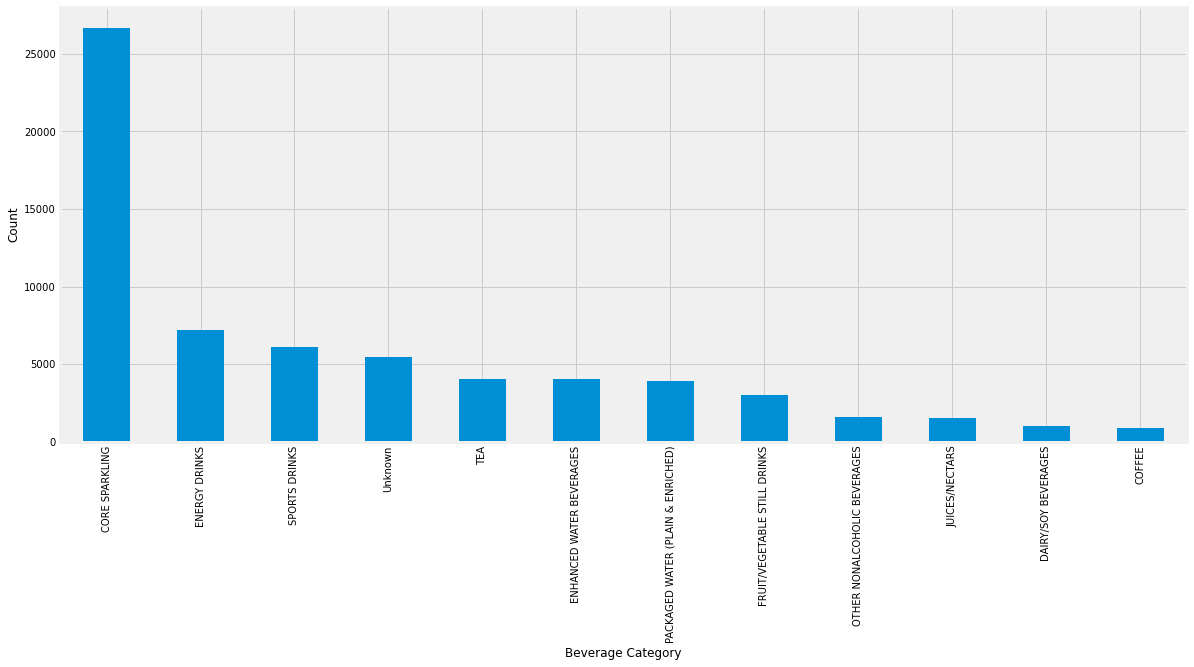

In [19]:
# Create a bar chart of a categorical column
f, ax = plt.subplots(1, 1, figsize=(18, 8))
Customer_Sales_df['BEV_CAT_DESC'].value_counts().plot(kind='bar')
plt.xlabel('Beverage Category')
plt.ylabel('Count')
plt.show()

### Average Invoice Price Per Beverage Category

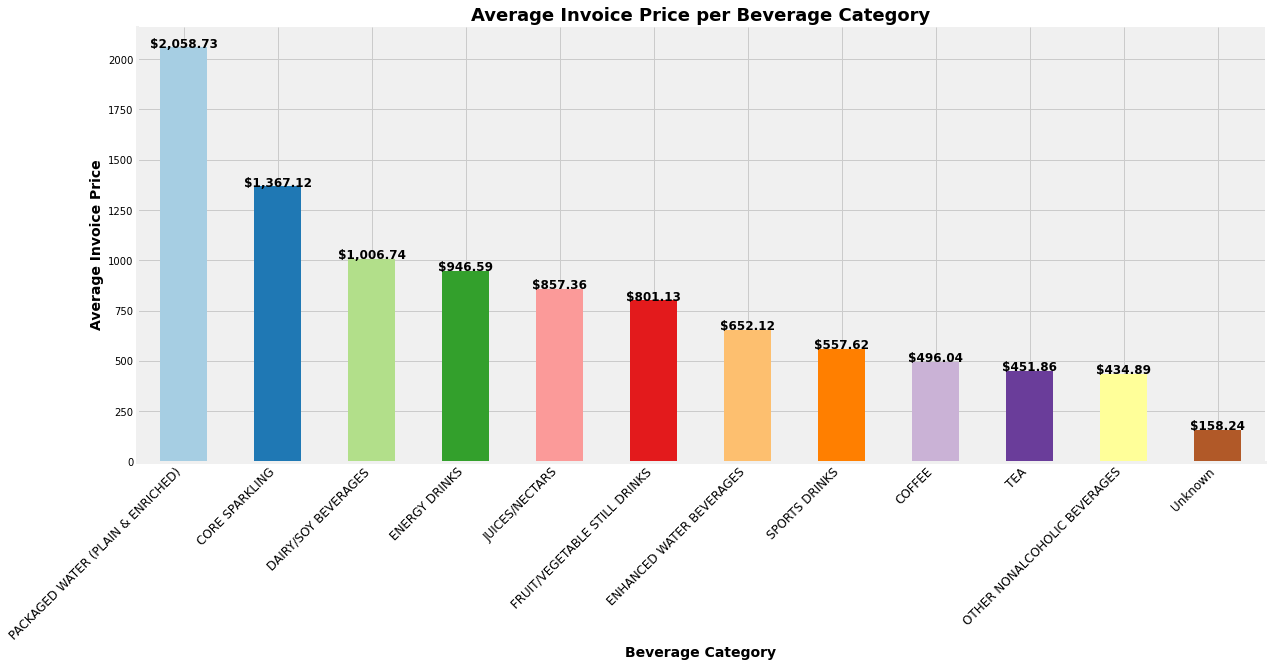

In [20]:
# Set a custom color palette
colors = sns.color_palette("Paired")

# Create the plot
f, ax = plt.subplots(1, 1, figsize=(18, 8))
grouped_df = Customer_Sales_df[['BEV_CAT_DESC', 'INVOICE_PRICE']].groupby(['BEV_CAT_DESC'])['INVOICE_PRICE'].mean()
grouped_df = grouped_df.sort_values(ascending=False)
grouped_df.plot.bar(ax=ax, color=colors)

# Customize the plot
ax.set_title('Average Invoice Price per Beverage Category', fontsize=18, fontweight='bold')
ax.set_xlabel('Beverage Category', fontsize=14, fontweight='bold')
ax.set_ylabel('Average Invoice Price', fontsize=14, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.yaxis.grid(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add values to the bars
for i, v in enumerate(grouped_df):
    ax.text(i, v+2, '${:,.2f}'.format(v), ha='center', fontsize=12, fontweight='bold', color='black')

plt.show()


### Total Number of Transactions by Activity Cluster

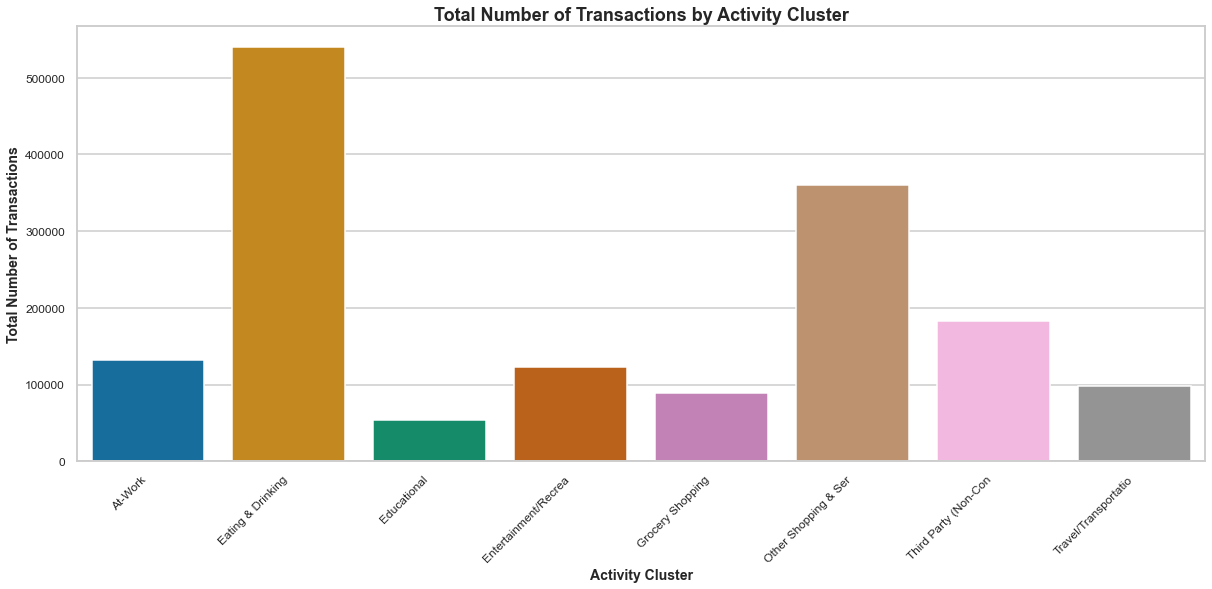

In [21]:
# Set the context and style of the plot
sns.set_context("talk")
sns.set_style("whitegrid")

f, ax = plt.subplots(1, 1, figsize=(18, 8))

# Create a grouped DataFrame
grouped_df = Customer_Sales_df[['CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION', 'NUM_OF_TRANSACTIONS']].dropna().groupby(['CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION'])['NUM_OF_TRANSACTIONS'].sum().reset_index()

# Create the bar plot using Seaborn
sns.barplot(x='CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION', y='NUM_OF_TRANSACTIONS', data=grouped_df, palette='colorblind')

# Customize the plot
plt.title('Total Number of Transactions by Activity Cluster', fontsize=18, fontweight='bold')
plt.xlabel('Activity Cluster', fontsize=14, fontweight='bold')
plt.ylabel('Total Number of Transactions', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.show()


### Counting Total Unique Customer

In [22]:
# counting total unique customer
n = len(pd.unique(Customer_Sales_df['CUSTOMER_NUMBER_BLINDED']))
print("No.of.unique values :", 
      n) 

No.of.unique values : 25393


### Counting Total Unique Customer by City

In [23]:
# counting total unique customer by city
Customer_Sales_df.groupby('ADDRESS_CITY')['CUSTOMER_NUMBER_BLINDED'].nunique()

ADDRESS_CITY
ABERDEEN           23
ACME                1
ADRIAN              1
AIRWAY HEIGHTS     10
AJO                 4
                 ... 
YERINGTON           5
YOUNGTOWN           2
YUCCA               1
YUMA              134
ZEPHYR COVE         4
Name: CUSTOMER_NUMBER_BLINDED, Length: 1218, dtype: int64

### Counting Total Unique Customer by Customer Activity

In [24]:
# counting total unique customer by customer activity
Customer_Sales_df.groupby(['CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION'])['CUSTOMER_NUMBER_BLINDED'].nunique()

CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION
At-Work                  1590
Eating & Drinking       12476
Educational               804
Entertainment/Recrea     2527
Grocery Shopping          675
Other Shopping & Ser     4626
Third Party (Non-Con     1429
Travel/Transportatio     1266
Name: CUSTOMER_NUMBER_BLINDED, dtype: int64

### Plot: Unique Customers per Activity Cluster

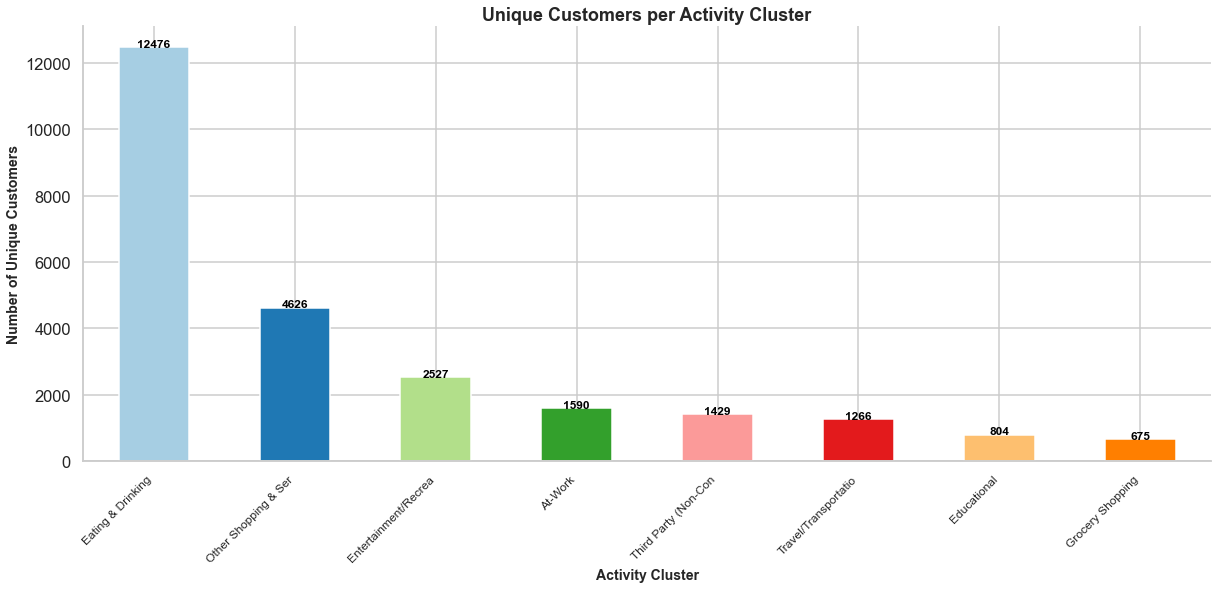

In [25]:
# Set a custom color palette
colors = sns.color_palette("Paired")

# Create the plot
f, ax = plt.subplots(1, 1, figsize=(18, 8))
grouped_df = Customer_Sales_df[['CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION', 'CUSTOMER_NUMBER_BLINDED']].dropna().groupby(['CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION'])['CUSTOMER_NUMBER_BLINDED'].nunique()
grouped_df = grouped_df.sort_values(ascending=False)
grouped_df.plot.bar(ax=ax, color=colors)

# Customize the plot
ax.set_title('Unique Customers per Activity Cluster', fontsize=18, fontweight='bold')
ax.set_xlabel('Activity Cluster', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Unique Customers', fontsize=14, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.yaxis.grid(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add counts to the bars
for i, v in enumerate(grouped_df):
    ax.text(i, v+2, str(v), ha='center', fontsize=12, fontweight='bold', color='black')
    
plt.show()


In [26]:
Customer_Sales_df["ADDRESS_CITY"].nunique()

1218

### Plot: Top 10 Cities by Unique Customers

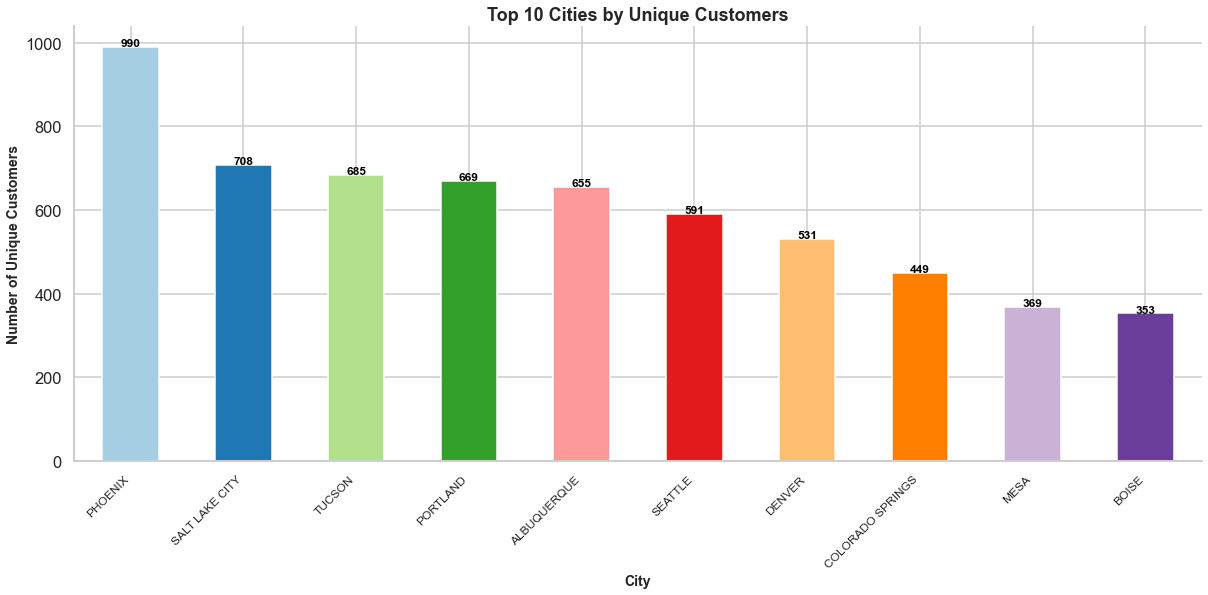

In [27]:
# Set a custom color palette
colors = sns.color_palette("Paired")

# Create the plot
f, ax = plt.subplots(1, 1, figsize=(18, 8))
grouped_df = Customer_Sales_df[['ADDRESS_CITY', 'CUSTOMER_NUMBER_BLINDED']].dropna().groupby(['ADDRESS_CITY'])['CUSTOMER_NUMBER_BLINDED'].nunique()
grouped_df = grouped_df.sort_values(ascending=False)[:10] # Keep only top 10 cities
grouped_df.plot.bar(ax=ax, color=colors)

# Customize the plot
ax.set_title('Top 10 Cities by Unique Customers', fontsize=18, fontweight='bold')
ax.set_xlabel('City', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Unique Customers', fontsize=14, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.yaxis.grid(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add counts to the bars
for i, v in enumerate(grouped_df):
    ax.text(i, v+2, str(v), ha='center', fontsize=12, fontweight='bold', color='black')
    
plt.show()


### Plot: Top 10 Cities by Gross Profit

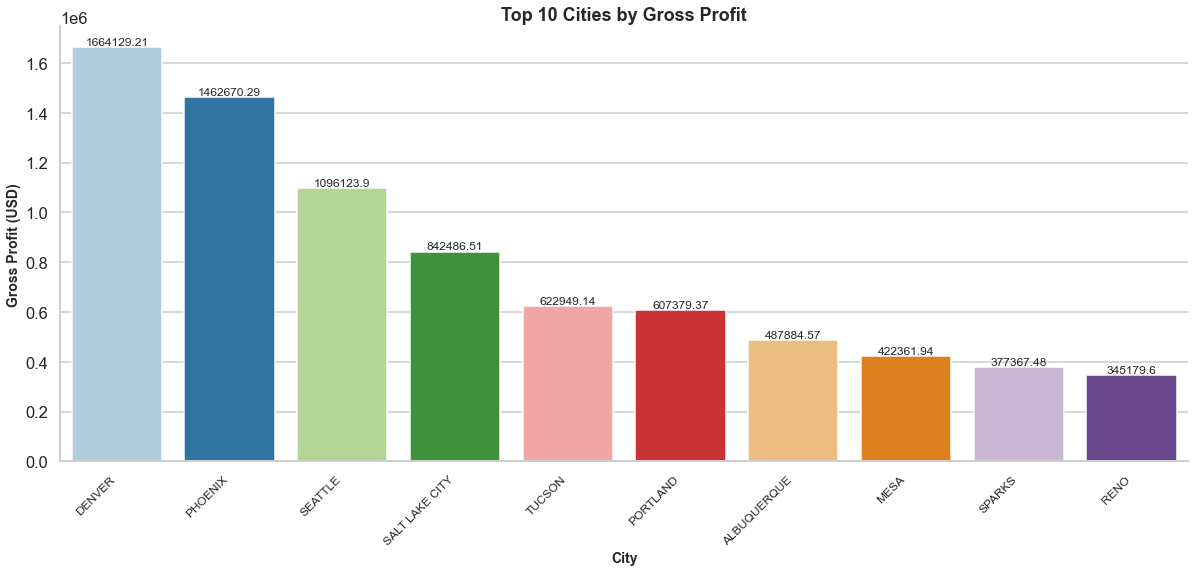

In [28]:

# Create the plot
f, ax = plt.subplots(1, 1, figsize=(18, 8))
grouped_df = Customer_Sales_df[['ADDRESS_CITY', 'GROSS_PROFIT_DEAD_NET']].groupby('ADDRESS_CITY')['GROSS_PROFIT_DEAD_NET'].sum()
grouped_df = grouped_df.reset_index()
grouped_df = grouped_df.sort_values('GROSS_PROFIT_DEAD_NET', ascending=False)
top_10_cities = grouped_df.head(10)

sns.barplot(x='ADDRESS_CITY', y='GROSS_PROFIT_DEAD_NET', data=top_10_cities, palette='Paired', ax=ax)

# Add counts to the bars
for i, bar in enumerate(ax.containers):
    ax.bar_label(bar, label_type='edge', labels=top_10_cities['GROSS_PROFIT_DEAD_NET'].values, fontsize=12)

# Customize the plot
ax.set_title('Top 10 Cities by Gross Profit', fontsize=18, fontweight='bold')
ax.set_xlabel('City', fontsize=14, fontweight='bold')
ax.set_ylabel('Gross Profit (USD)', fontsize=14, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.yaxis.grid(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()



### Plot: BEV_CAT_DESC by Unique Customers

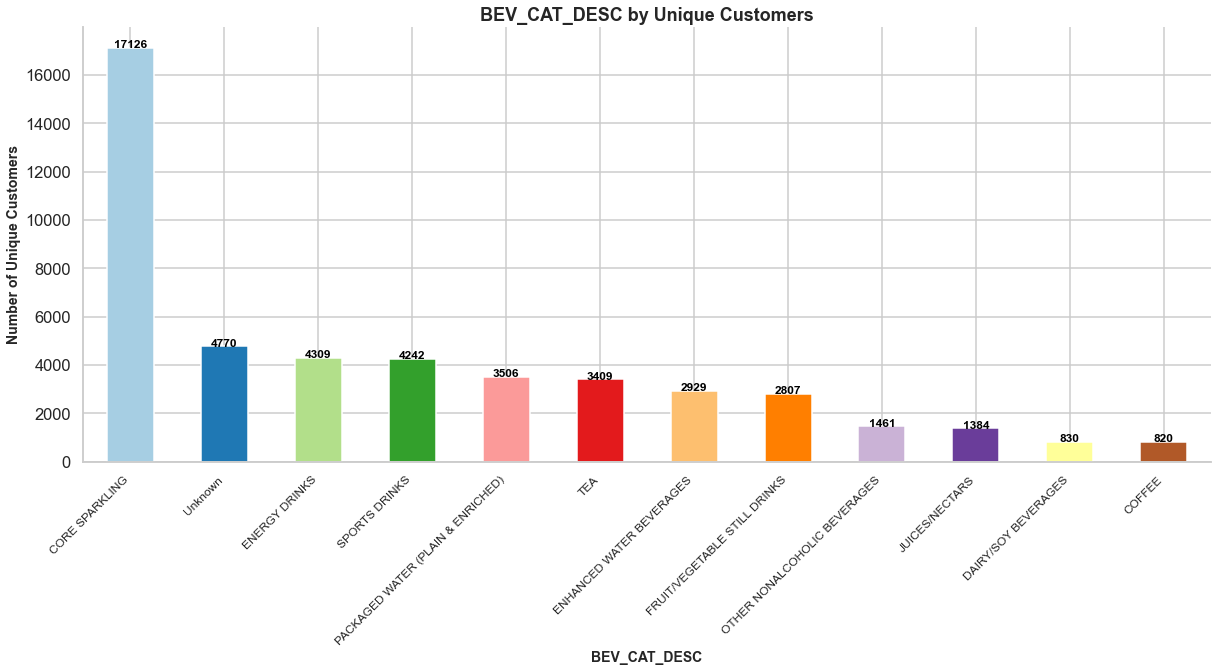

In [29]:
# Set a custom color palette
colors = sns.color_palette("Paired")

# Create the plot
f, ax = plt.subplots(1, 1, figsize=(18, 8))
grouped_df = Customer_Sales_df[['BEV_CAT_DESC', 'CUSTOMER_NUMBER_BLINDED']].dropna().groupby(['BEV_CAT_DESC'])['CUSTOMER_NUMBER_BLINDED'].nunique()
grouped_df = grouped_df.sort_values(ascending=False) 
grouped_df.plot.bar(ax=ax, color=colors)

# Customize the plot
ax.set_title('BEV_CAT_DESC by Unique Customers', fontsize=18, fontweight='bold')
ax.set_xlabel('BEV_CAT_DESC', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Unique Customers', fontsize=14, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.yaxis.grid(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add counts to the bars
for i, v in enumerate(grouped_df):
    ax.text(i, v+2, str(v), ha='center', fontsize=12, fontweight='bold', color='black')  
plt.show()

### Unique_Pack_Sizes

In [30]:
unique_pack_sizes = Customer_Sales_df['PACK_SIZE_SALES_UNIT_DESCRIPTION'].unique()
print(unique_pack_sizes)

['20 OZ 1-Ls 12' '20 OZ 1-Ls 24' '40 X 48 INCH 1-Ls' '16 OZ 1-Ls'
 '16 OZ 1-Ls 24' '13.7 OZ 1-Ls 12' '2 LTR 1-Ls 8' '28 OZ 1-Ls 12'
 '12 OZ 12-Pk 24 Frid' '1 LTR 1-Ls 12' '355 ML 24-Pk 24' '355 ML 1-Ls 24'
 '20 OZ 8-Pk 24' '23 OZ 1-Ls 12' '20 OZ 1-Ls' '14 OZ 1-Ls 12'
 '16 OZ 4-Pk 24' '16 OZ 1-Ls 12' '15.5 OZ 1-Ls 24' '23.7 OZ 1-Ls 24'
 '36 X 36 INCH 1-Ls' '12 OZ 1-Ls 24' '18.5 OZ 1-Ls 12' '2.5 GALLON 1-Ls'
 '12 OZ 6-Pk 24' '12 OZ 1-Ls 12' '1 LTR 1-Ls' '16 OZ 12-Pk 12'
 '12 OZ 8-Pk 24' '5 GALLON 1-Ls' '23.7 OZ 1-Ls 12' '10.1 OZ 1-Ls 12'
 '15 OZ 1-Ls 12' '50 POUND 1-Ls' '2 LTR 1-Ls' '12 OZ 24-Pk 24'
 '35 POUND 1-Ls' 'Not Applicable 1-Ls' '16 OZ 10-Pk 20 Frid'
 '7.5 OZ 10-Pk 30 Frid' '20.2 FLUID OUNCE 1-Ls 12' '28 OZ 1-Ls 15'
 '33.8 OZ 6-Pk 12' '16.9 OZ 24-Pk 24' '16.9 OZ 6-Pk 24' '23.7 OZ 6-Pk 24'
 '16.9 OZ 1-Ls 12' '16 OZ 12-Pk 24' '7.5 OZ 6-Pk 24' '8.5 OZ 1-Ls 24'
 '20 POUND 1-Ls' '23 OZ 1-Ls' '21 OZ 1-Ls' '16.9 OZ 32-Pk 32'
 '20 OZ 24-Pk 24' '25.4 OZ 1-Ls 12' '32 OZ 1-Ls' '500 ML 1-Ls

### Plot: Sales by Geographic Location

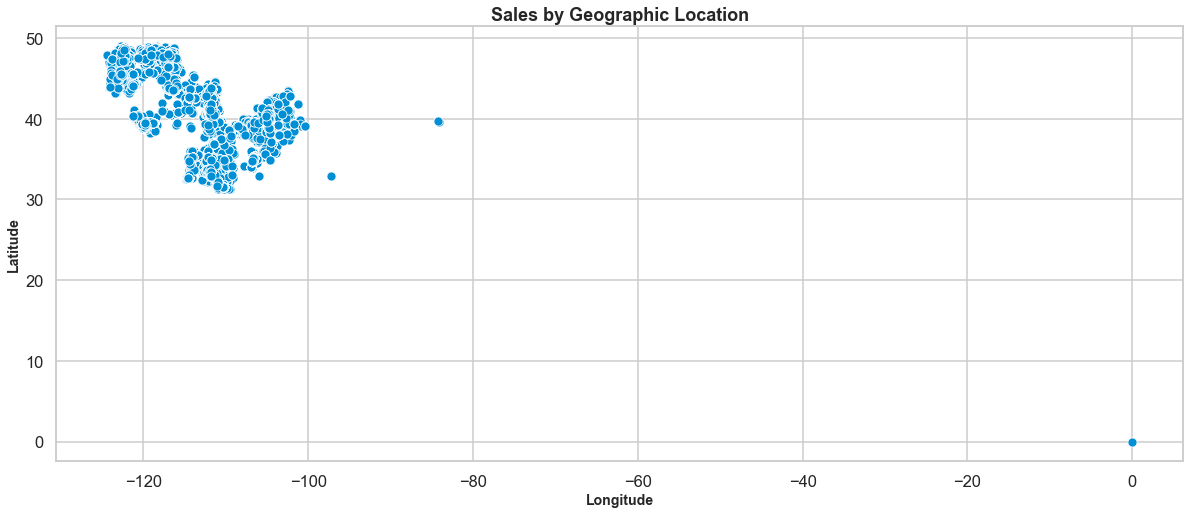

In [31]:
f, ax = plt.subplots(1, 1, figsize=(18, 8))
# Create the plot
sns.scatterplot(x='GEO_LONGITUDE', y='GEO_LATITUDE', data=Customer_Sales_df)

# Customize the plot
plt.title('Sales by Geographic Location', fontsize=18, fontweight='bold')
plt.xlabel('Longitude', fontsize=14, fontweight='bold')
plt.ylabel('Latitude', fontsize=14, fontweight='bold')
plt.show()

### Plot: Sales Over Time

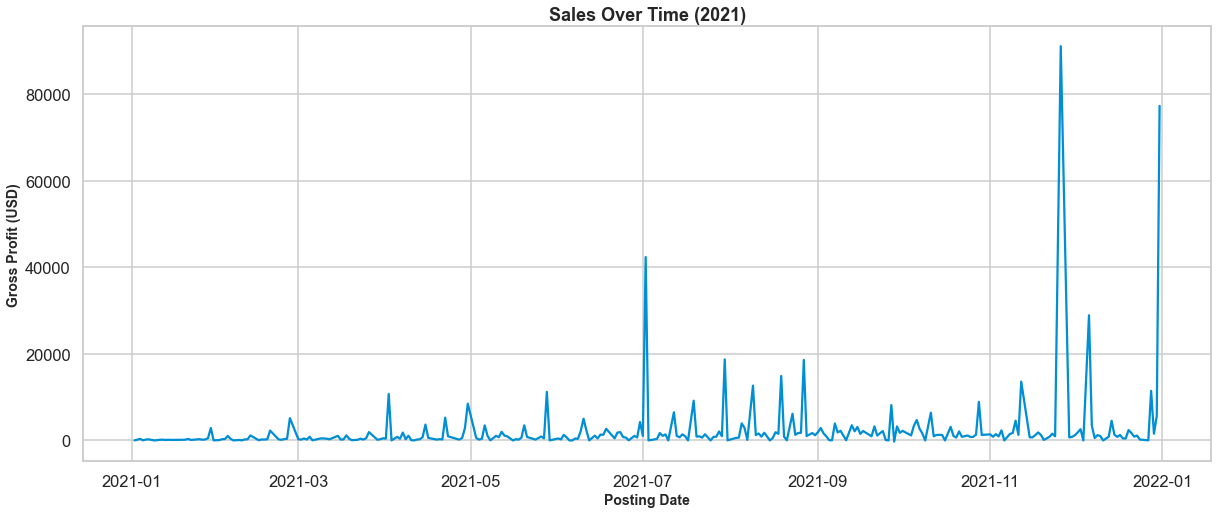

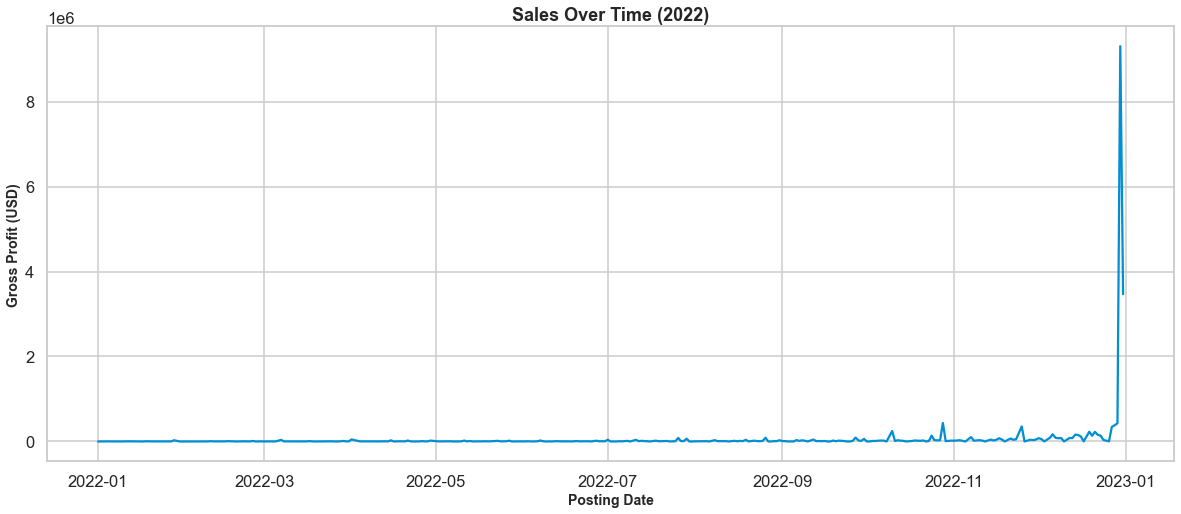

In [32]:
# Group the data by year and posting date and sum the sales
sales_by_date = Customer_Sales_df.groupby([Customer_Sales_df['MAX_POSTING_DATE'].dt.year, 'MAX_POSTING_DATE'])['GROSS_PROFIT_DEAD_NET'].sum()

# Create the plot for each year
for year in sales_by_date.index.get_level_values(0).unique():
    fig, ax = plt.subplots(figsize=(18, 8))
    ax.plot(sales_by_date.loc[year].index, sales_by_date.loc[year].values)
    
    # Customize the plot
    ax.set_title(f'Sales Over Time ({year})', fontsize=18, fontweight='bold')
    ax.set_xlabel('Posting Date', fontsize=14, fontweight='bold')
    ax.set_ylabel('Gross Profit (USD)', fontsize=14, fontweight='bold')
    ax.grid(True)
    plt.show()


### Physical volume across different Cities (Top 10 Cities) 

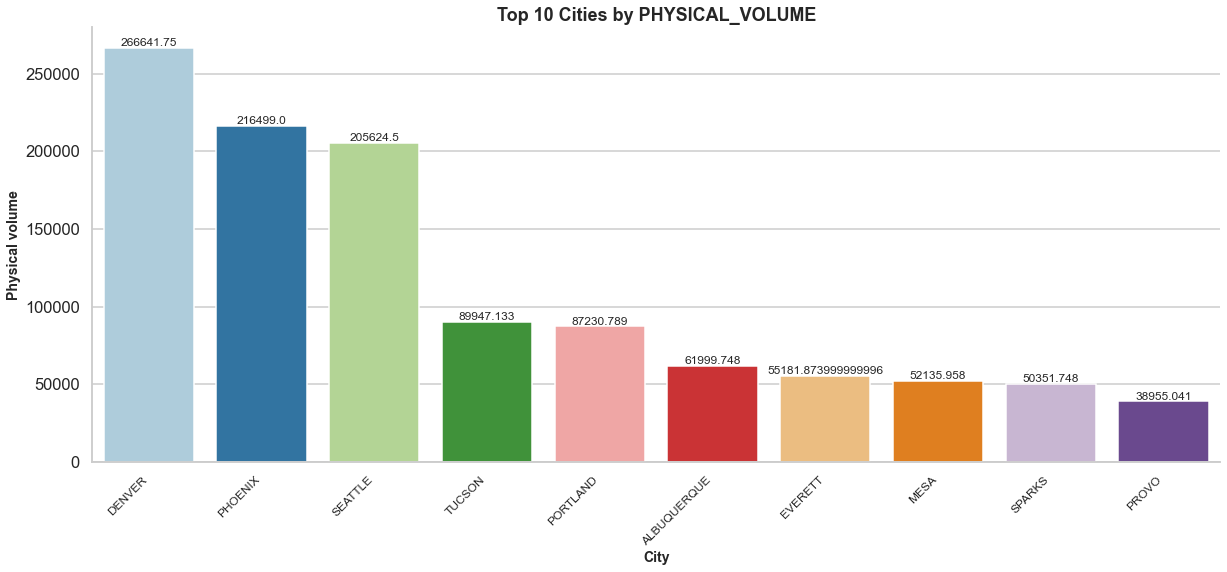

In [33]:

# Create the plot
f, ax = plt.subplots(1, 1, figsize=(18, 8))
grouped_df = Customer_Sales_df[['ADDRESS_CITY', 'PHYSICAL_VOLUME']].groupby('ADDRESS_CITY')['PHYSICAL_VOLUME'].sum()
grouped_df = grouped_df.reset_index()
grouped_df = grouped_df.sort_values('PHYSICAL_VOLUME', ascending=False)
top_10_cities = grouped_df.head(10)

sns.barplot(x='ADDRESS_CITY', y='PHYSICAL_VOLUME', data=top_10_cities, palette='Paired', ax=ax)

# Add counts to the bars
for i, bar in enumerate(ax.containers):
    ax.bar_label(bar, label_type='edge', labels=top_10_cities['PHYSICAL_VOLUME'].values, fontsize=12)

# Customize the plot
ax.set_title('Top 10 Cities by PHYSICAL_VOLUME', fontsize=18, fontweight='bold')
ax.set_xlabel('City', fontsize=14, fontweight='bold')
ax.set_ylabel('Physical volume', fontsize=14, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.yaxis.grid(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()



### Physical volume across different Customer trade channels (Top 10) 

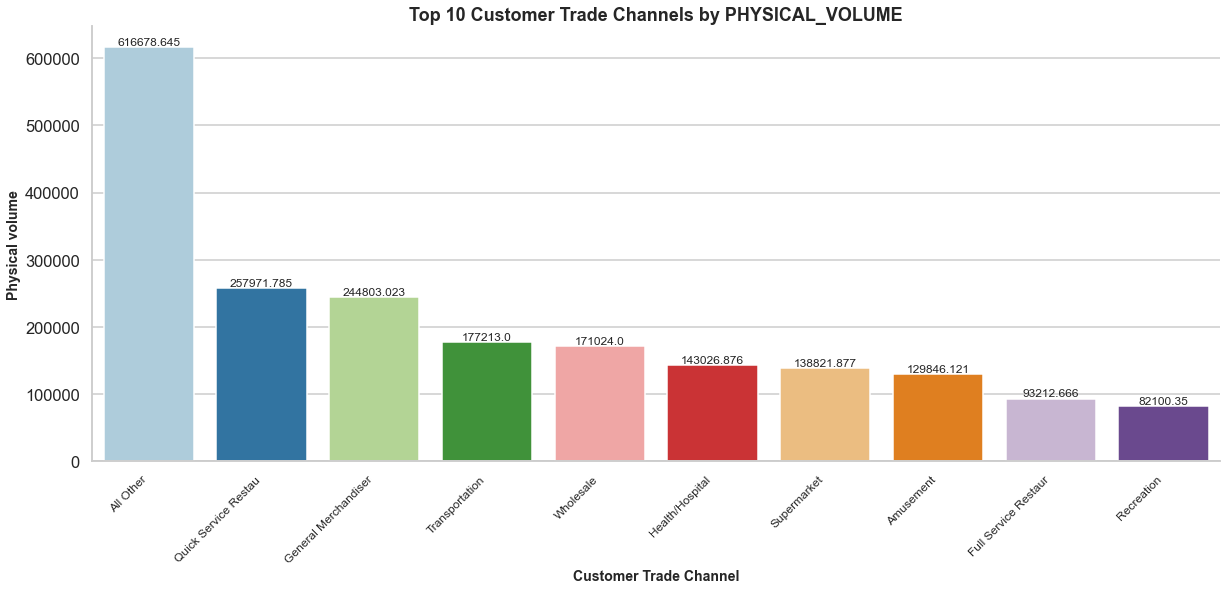

In [34]:

# Create the plot
f, ax = plt.subplots(1, 1, figsize=(18, 8))
grouped_df = Customer_Sales_df[['CUSTOMER_TRADE_CHANNEL_DESCRIPTION', 'PHYSICAL_VOLUME']].groupby('CUSTOMER_TRADE_CHANNEL_DESCRIPTION')['PHYSICAL_VOLUME'].sum()
grouped_df = grouped_df.reset_index()
grouped_df = grouped_df.sort_values('PHYSICAL_VOLUME', ascending=False)
top_10_trade_channels = grouped_df.head(10)

sns.barplot(x='CUSTOMER_TRADE_CHANNEL_DESCRIPTION', y='PHYSICAL_VOLUME', data=top_10_trade_channels, palette='Paired', ax=ax)

# Add counts to the bars
for i, bar in enumerate(ax.containers):
    ax.bar_label(bar, label_type='edge', labels=top_10_trade_channels['PHYSICAL_VOLUME'].values, fontsize=12)

# Customize the plot
ax.set_title('Top 10 Customer Trade Channels by PHYSICAL_VOLUME', fontsize=18, fontweight='bold')
ax.set_xlabel('Customer Trade Channel', fontsize=14, fontweight='bold')
ax.set_ylabel('Physical volume', fontsize=14, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.yaxis.grid(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


### Number of transaction across different Cities (Top 10) 

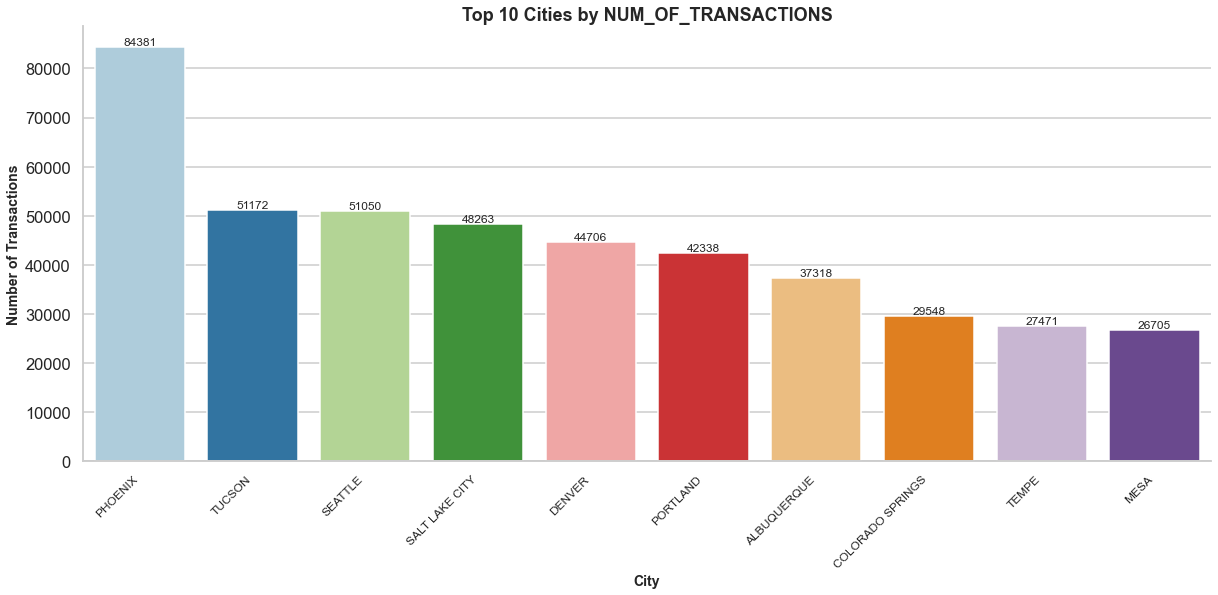

In [35]:

# Create the plot
f, ax = plt.subplots(1, 1, figsize=(18, 8))
grouped_df = Customer_Sales_df[['ADDRESS_CITY', 'NUM_OF_TRANSACTIONS']].groupby('ADDRESS_CITY')['NUM_OF_TRANSACTIONS'].sum()
grouped_df = grouped_df.reset_index()
grouped_df = grouped_df.sort_values('NUM_OF_TRANSACTIONS', ascending=False)
top_10_cities = grouped_df.head(10)

sns.barplot(x='ADDRESS_CITY', y='NUM_OF_TRANSACTIONS', data=top_10_cities, palette='Paired', ax=ax)

# Add counts to the bars
for i, bar in enumerate(ax.containers):
    ax.bar_label(bar, label_type='edge', labels=top_10_cities['NUM_OF_TRANSACTIONS'].values, fontsize=12)

# Customize the plot
ax.set_title('Top 10 Cities by NUM_OF_TRANSACTIONS', fontsize=18, fontweight='bold')
ax.set_xlabel('City', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Transactions', fontsize=14, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.yaxis.grid(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


### Distribution of Number of transaction by Customer trade channel

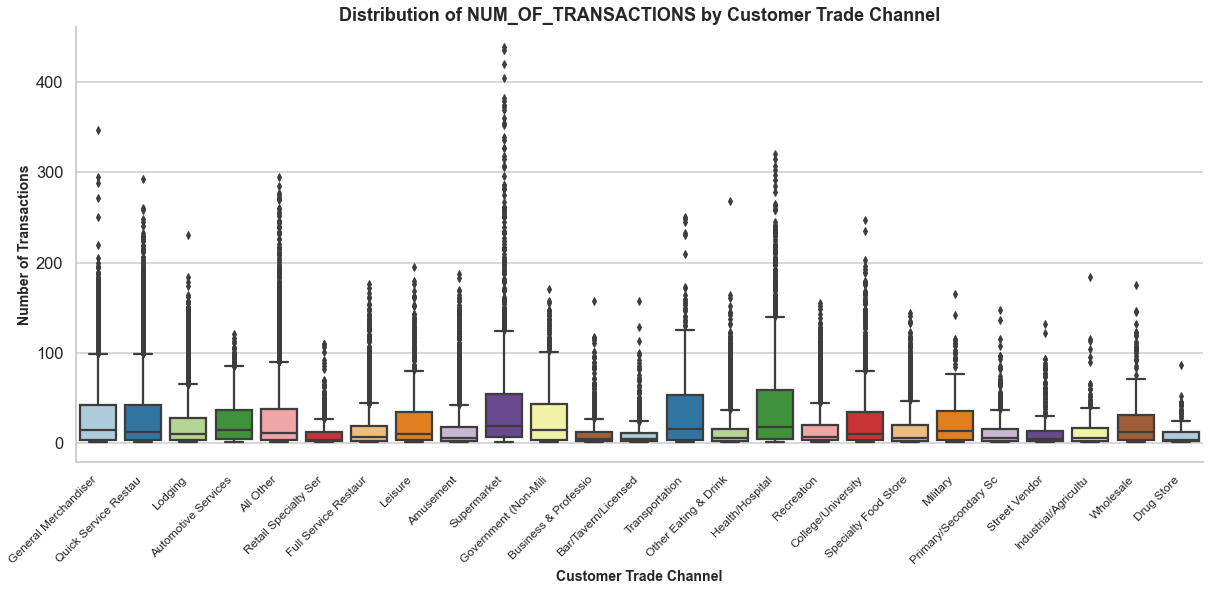

In [36]:
# Create the plot
f, ax = plt.subplots(1, 1, figsize=(18, 8))
sns.boxplot(x='CUSTOMER_TRADE_CHANNEL_DESCRIPTION', y='NUM_OF_TRANSACTIONS', data=Customer_Sales_df, palette='Paired', ax=ax)

# Customize the plot
ax.set_title('Distribution of NUM_OF_TRANSACTIONS by Customer Trade Channel', fontsize=18, fontweight='bold')
ax.set_xlabel('Customer Trade Channel', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Transactions', fontsize=14, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.yaxis.grid(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


### Relationship between Physical volume and Number of transactions

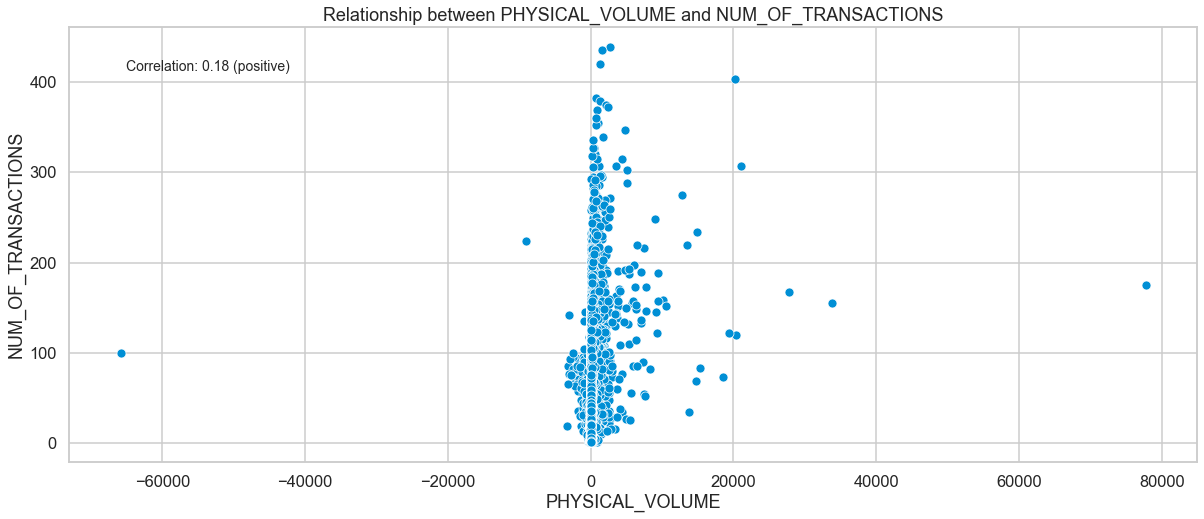

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 1, figsize=(18, 8))
sns.scatterplot(x='PHYSICAL_VOLUME', y='NUM_OF_TRANSACTIONS', data=Customer_Sales_df)

plt.title('Relationship between PHYSICAL_VOLUME and NUM_OF_TRANSACTIONS')
plt.xlabel('PHYSICAL_VOLUME')
plt.ylabel('NUM_OF_TRANSACTIONS')

# Calculate correlation coefficient
corr_coef = Customer_Sales_df['PHYSICAL_VOLUME'].corr(Customer_Sales_df['NUM_OF_TRANSACTIONS'])

# Add text annotation for correlation coefficient
if corr_coef >= 0:
    corr_text = f"Correlation: {corr_coef:.2f} (positive)"
else:
    corr_text = f"Correlation: {corr_coef:.2f} (negative)"
    
plt.annotate(corr_text, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=14)

plt.show()


A correlation of 0.18 suggests a positive but weak relationship between PHYSICAL_VOLUME and NUM_OF_TRANSACTIONS. This means that as PHYSICAL_VOLUME increases, there tends to be a slight increase in NUM_OF_TRANSACTIONS, but the relationship is not very strong.       

###  Relationship between Physical volume and Gross profit

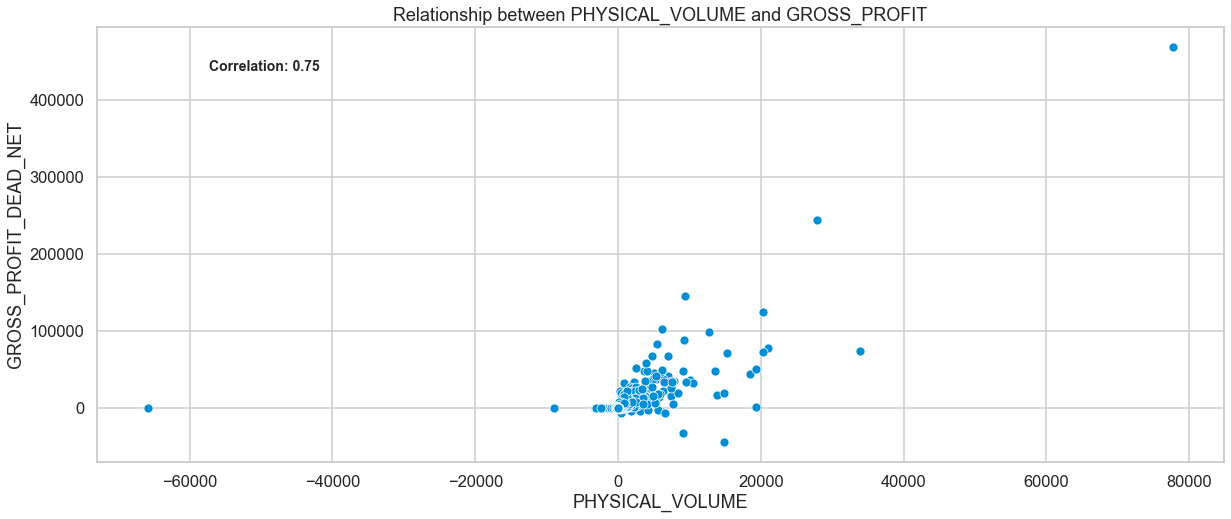

In [38]:
f, ax = plt.subplots(1, 1, figsize=(18, 8))
sns.scatterplot(x='PHYSICAL_VOLUME', y='GROSS_PROFIT_DEAD_NET', data=Customer_Sales_df)

plt.title('Relationship between PHYSICAL_VOLUME and GROSS_PROFIT')
plt.xlabel('PHYSICAL_VOLUME')
plt.ylabel('GROSS_PROFIT_DEAD_NET')

# Add correlation text
corr = Customer_Sales_df['PHYSICAL_VOLUME'].corr(Customer_Sales_df['GROSS_PROFIT_DEAD_NET'])
corr_text = f"Correlation: {corr:.2f}"
plt.text(0.1, 0.9, corr_text, transform=ax.transAxes, fontsize=14, fontweight='bold')

plt.show()


The correlation is 0.75, indicates a moderately strong positive relationship between the PHYSICAL_VOLUME and GROSS_PROFIT

###  Relationship between Number of transaction and Gross profit

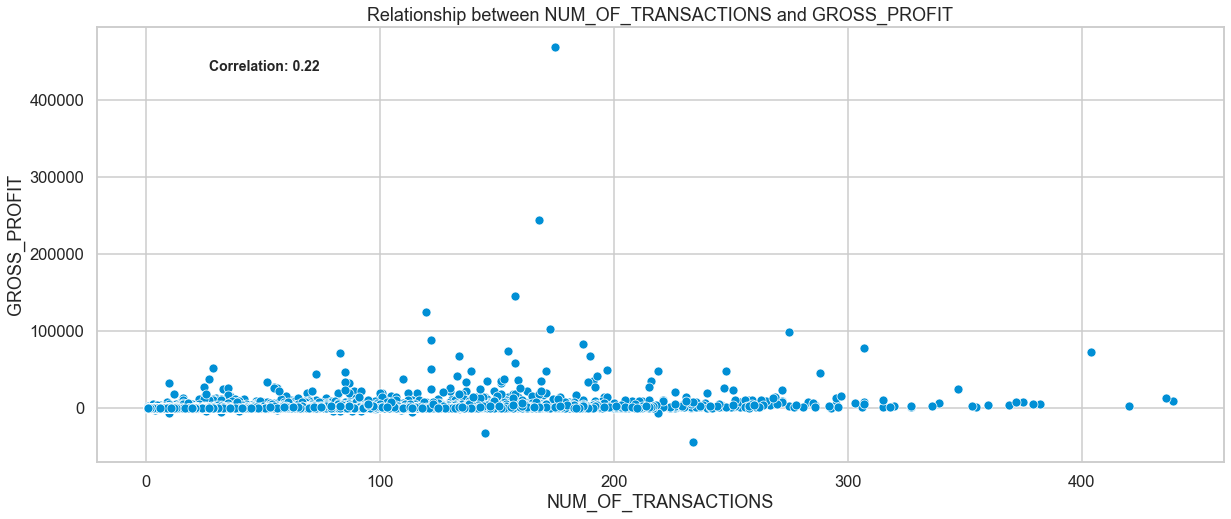

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 1, figsize=(18, 8))
sns.scatterplot(x='NUM_OF_TRANSACTIONS', y='GROSS_PROFIT_DEAD_NET', data=Customer_Sales_df)

# Calculate correlation coefficient
corr = Customer_Sales_df['NUM_OF_TRANSACTIONS'].corr(Customer_Sales_df['GROSS_PROFIT_DEAD_NET'])

corr_text = f"Correlation: {corr:.2f}"
plt.text(0.1, 0.9, corr_text, transform=ax.transAxes, fontsize=14, fontweight='bold')

plt.title('Relationship between NUM_OF_TRANSACTIONS and GROSS_PROFIT')
plt.xlabel('NUM_OF_TRANSACTIONS')
plt.ylabel('GROSS_PROFIT')

plt.show()


A correlation coefficient of 0.22 indicates a weak positive correlation between the number of transactions and gross profit. It suggests that there is a slight tendency for higher number of transactions to be associated with higher gross profit, but the relationship is not very strong.

### Correlation Matrix

In [40]:
# Calculate correlation between columns
correlation = Customer_Sales_df.corr()

# Create a copy of correlation matrix excluding diagonal and duplicate values
corr_matrix = correlation.mask(np.tril(np.ones_like(correlation, dtype=np.bool_)))

# Get the top positive and negative correlated pairs
pos_corr = corr_matrix.stack().sort_values(ascending=False).head(5)
neg_corr = corr_matrix.stack().sort_values().head(2)

# Print the results
print("Top 5 Positive Correlations:")
print(pos_corr)
print("\nTop 2 Negative Correlations:")
print(neg_corr)


Top 5 Positive Correlations:
INVOICE_PRICE  DEAD_NET                 0.977121
DEAD_NET       COGS                     0.974065
INVOICE_PRICE  COGS                     0.958765
DEAD_NET       GROSS_PROFIT_DEAD_NET    0.878511
DISCOUNT       GROSS_PROFIT_DEAD_NET    0.859013
dtype: float64

Top 2 Negative Correlations:
GEO_LONGITUDE  GEO_LATITUDE          -0.662621
GEO_LATITUDE   NUM_OF_TRANSACTIONS   -0.032819
dtype: float64


                        GEO_LONGITUDE  GEO_LATITUDE    RATING  \
GEO_LONGITUDE                1.000000     -0.662621 -0.025947   
GEO_LATITUDE                -0.662621      1.000000 -0.017908   
RATING                      -0.025947     -0.017908  1.000000   
PHYSICAL_VOLUME             -0.001123     -0.002388  0.007769   
DISCOUNT                     0.001880     -0.003004  0.007760   
INVOICE_PRICE                0.006000     -0.006977  0.007431   
DEAD_NET                     0.006919     -0.006082  0.008173   
GROSS_PROFIT_DEAD_NET        0.008625     -0.010621  0.006916   
COGS                         0.007037     -0.005380  0.007653   
NUM_OF_TRANSACTIONS         -0.001674     -0.032819  0.028206   
PHYSICAL_LEVEL               0.020246     -0.031935  0.009036   
YEARS_SINCE_ONBOARDING       0.006367     -0.003840 -0.005949   

                        PHYSICAL_VOLUME  DISCOUNT  INVOICE_PRICE  DEAD_NET  \
GEO_LONGITUDE                 -0.001123  0.001880       0.006000  0.006919  

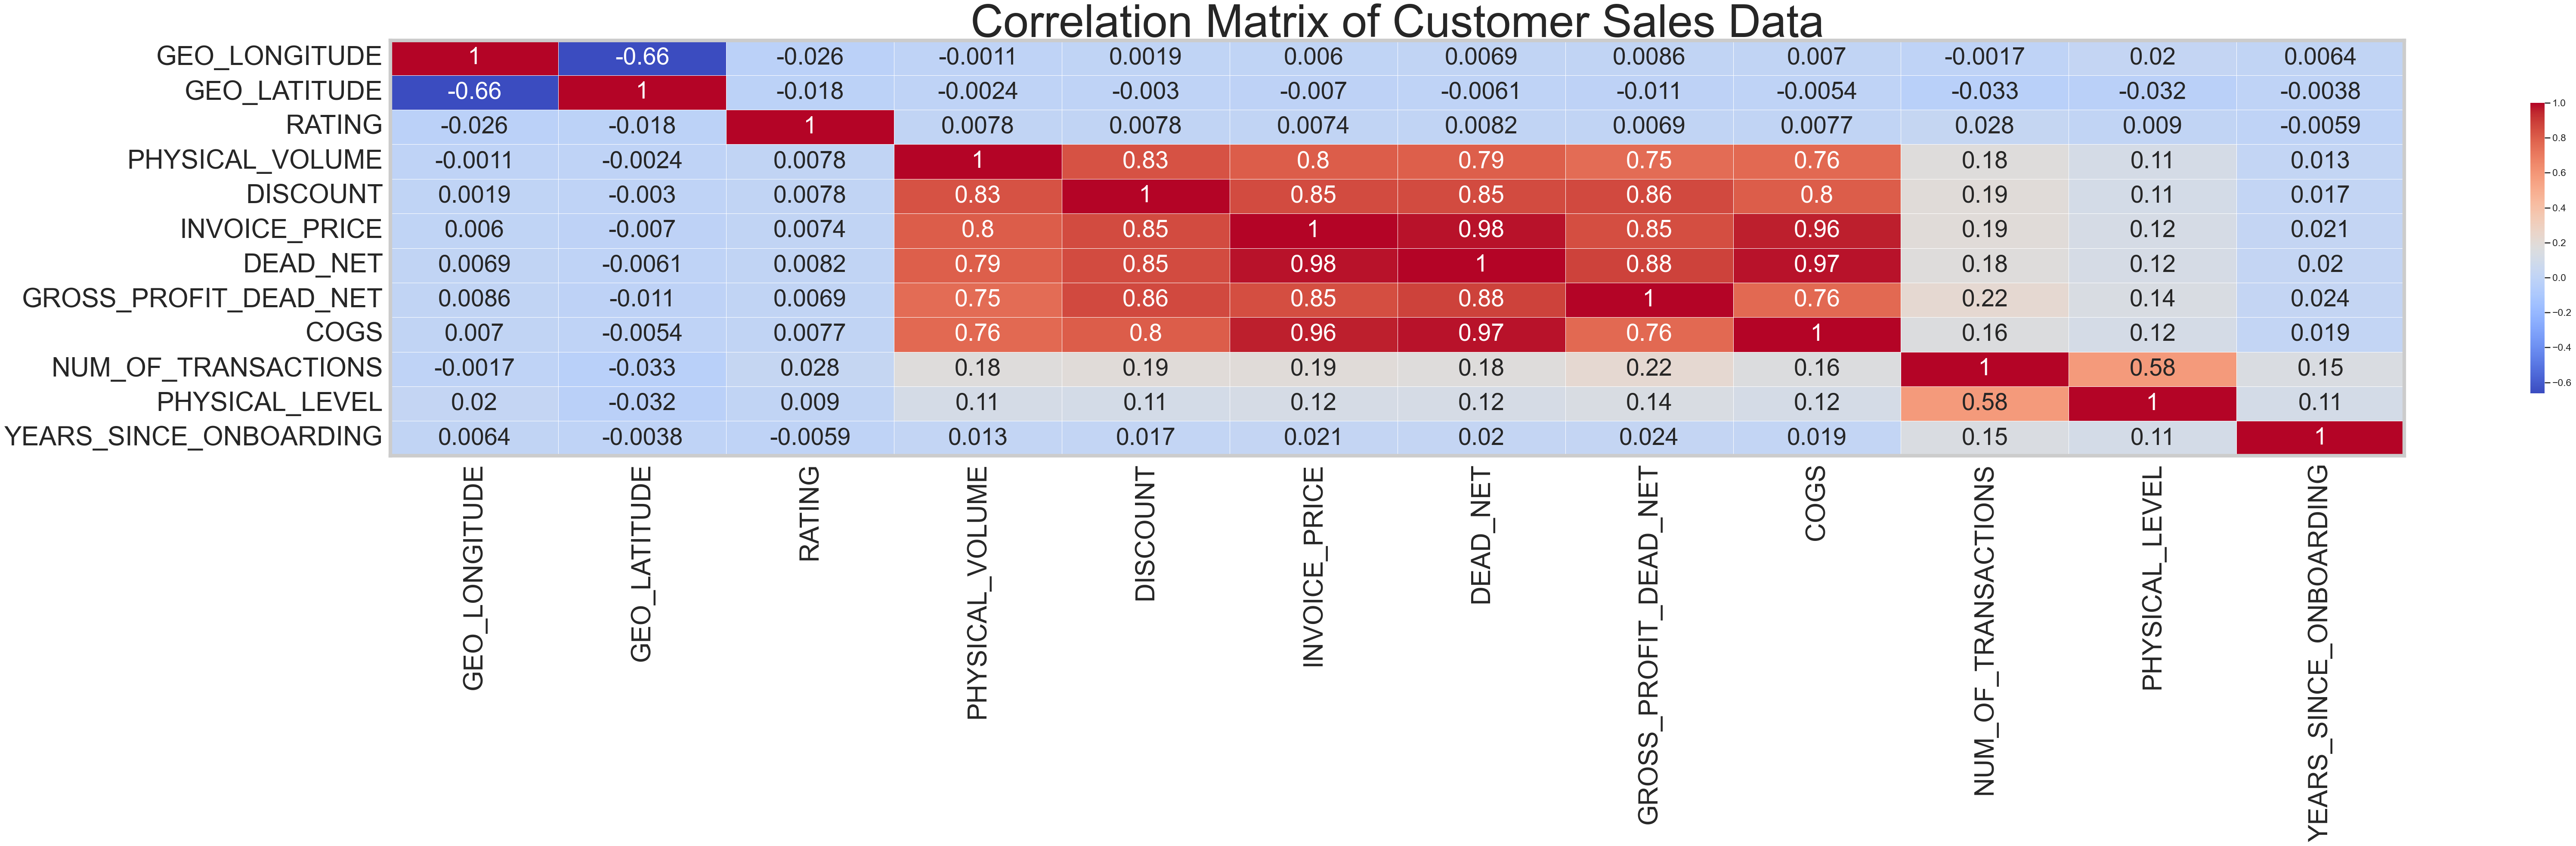

In [41]:
# Set up the correlation matrix
corr_matrix = Customer_Sales_df.corr()
print(corr_matrix)

# Create the heatmap
plt.figure(figsize=(68, 20), dpi=100)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white', cbar_kws={'orientation': 'vertical', 'shrink': 0.7})

# Set the font size of the x and y axis labels
plt.xticks(fontsize=44, rotation=90)
plt.yticks(fontsize=44)



# Increase the font size of correlation values
for _, spine in plt.gca().spines.items():
    spine.set_visible(True)
    spine.set_linewidth(6)

for text in plt.gca().texts:
    if text.get_text().startswith('-'):
        text.set_size(40)
    else:
        text.set_size(40)

# Set the title
plt.title('Correlation Matrix of Customer Sales Data', fontsize=76)

plt.tight_layout()
plt.show()


The diagonal elements are all 1, indicating that each variable is perfectly correlated with itself (as expected).

There is positive correlation between DISCOUNT and GROSS_PROFIT_DEAD_NET, with a coefficient of 0.859013. This suggests that when the discount increases, gross profit (after accounting for dead net) tends to increase as well.

There is negative correlation is between GEO_LONGITUDE and GEO_LATITUDE, with a coefficient of -0.662642. This suggests that as the longitude of a location increases, the latitude tends to decrease (and vice versa).

There are relatively strong positive correlations between several pairs of variables, such as PHYSICAL_VOLUME and DISCOUNT, and between COGS and INVOICE_PRICE. This suggests that these variables may be related and that changes in one variable may be associated with changes in the other.


###### However, it's important to keep in mind that we won't have these variables for new customers. So, we'll focus more on how our target variables, such as rating, physical volume, and years since onboarding, are correlated with each other. So by observing our target variables,, they do not show significant correlations with each other , so we should fit them in the model considering this.

## EDA Result

Performed Exploratory Data Analysis (EDA) on the Swire Coca-Cola customer and sales data. The EDA included the following steps:

Imported the necessary libraries, including NumPy, Pandas, Matplotlib, Seaborn, and Warnings. Imported the customer and sales data files into Pandas data frames. Checked the dimensions of each data frame and previewed the data using the head() function to understand it better. Checked for missing values in each data frame  using the isnull().sum() function. Replaced missing values in the BEV_CAT_DESC and CALORIE_CAT_DESC columns of the sales data frame with the string "Unknown." Created a new data frame called Customer_Sales_df by merging the customer and sales data frames using the merge() function. Conducted further EDA to explore questions related to the target variables and other variables of interest. Overall, did data exploration to identify relevant variables to predict customer popularity, longevity, and total 3-year sales volume. Additionally, got better understanding of the relationship between different variables and the outcome variables.

## Modelling

### Data preprocessing on categorical variables, Feature selection, and Modeling 

In [42]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load the data to dataframe df
df = Customer_Sales_df

# Select the categorical variables to encode
cat_vars = ["SALES_OFFICE_DESCRIPTION", "DELIVERY_PLANT_DESCRIPTION",
            "CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION", "CUSTOMER_TRADE_CHANNEL_DESCRIPTION",
            "CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION", "BUSINESS_TYPE_EXTENSION_DESCRIPTION",
            "CUSTOMER_TRADE_CHANNEL_DESCRIPTION2","ADDRESS_CITY","MARKET_DESCRIPTION",
            "COLD_DRINK_CHANNEL_DESCRIPTION","COUNTY"]

# Perform one-hot encoding on the selected variables
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_vars = encoder.fit_transform(df[cat_vars])

# Create a new dataframe with the encoded variables
encoded_df = pd.DataFrame(encoded_vars, columns=encoder.get_feature_names(cat_vars))

# Combine the encoded variables with the original data
final_df = pd.concat([df.drop(columns=cat_vars), encoded_df], axis=1)


In this code, we are performing one-hot encoding on a set of categorical variables in a Pandas dataframe using the OneHotEncoder class from the scikit-learn library. The encoded variables are then used to create a new dataframe, which is then combined with the original data to create a final dataframe with the encoded variables. One-hot encoding is a technique used to convert categorical variables into a numerical format that can be used as input to machine learning models. It creates a set of binary variables for each possible category, indicating whether a particular category is present or not for each data point.

In [43]:
final_df

,CUSTOMER_NUMBER_BLINDED,ON_BOARDING_DATE,ADDRESS_ZIP_CODE,GEO_LONGITUDE,GEO_LATITUDE,RATING,PRODUCT_SOLD_BLINDED,BEV_CAT_DESC,CALORIE_CAT_DESC,PACK_TYPE_DESC,...,COUNTY_WAYNE,COUNTY_WEBER,COUNTY_WELD,COUNTY_WHATCOM,COUNTY_WHITE PINE,COUNTY_WHITMAN,COUNTY_YAMHILL,COUNTY_YAVAPAI,COUNTY_YUMA,COUNTY_nan
0,C0895044502170683,2017-02-06,85756-6948,-110.928378,32.115937,1,M073108800043,ENHANCED WATER BEVERAGES,REGULAR CALORIE,Plastic Bottle - Other,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C0895044502170683,2017-02-06,85756-6948,-110.928378,32.115937,1,M096503930454,FRUIT/VEGETABLE STILL DRINKS,REGULAR CALORIE,Plastic Bottle - Other,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C0895044502170683,2017-02-06,85756-6948,-110.928378,32.115937,1,M018805490936,Unknown,Unknown,Pallet,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,C0895044502170683,2017-02-06,85756-6948,-110.928378,32.115937,1,M077802430676,Unknown,Unknown,Plastic Lid,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C0895044502170683,2017-02-06,85756-6948,-110.928378,32.115937,1,M004204530388,ENHANCED WATER BEVERAGES,LOW CALORIE,Aluminum Can,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65521,C0342080202810836,2022-08-10,80513,-105.086055,40.305140,0,M056203880974,CORE SPARKLING,REGULAR CALORIE,Plastic Bottle - Contour,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65522,C0127073508500918,2022-03-03,97439-8925,-124.100230,43.998640,0,M090307340659,FRUIT/VEGETABLE STILL DRINKS,REGULAR CALORIE,Bag-In-Box,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65523,C0967044802730825,2016-03-17,83804,-116.983959,48.017110,1,M085603320548,CORE SPARKLING,REGULAR CALORIE,Glass Bottle - Other,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65524,C0221058209010554,2022-06-29,81050-8701,-103.569067,37.991034,0,M040609600997,TEA,LOW CALORIE,Bag-In-Box,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# Check data types
final_df.dtypes

CUSTOMER_NUMBER_BLINDED            object
ON_BOARDING_DATE           datetime64[ns]
ADDRESS_ZIP_CODE                   object
GEO_LONGITUDE                     float64
GEO_LATITUDE                      float64
                                ...      
COUNTY_WHITMAN                    float64
COUNTY_YAMHILL                    float64
COUNTY_YAVAPAI                    float64
COUNTY_YUMA                       float64
COUNTY_nan                        float64
Length: 1690, dtype: object

In [45]:
df = final_df

### Identifying Unusable Variables

Variables that won't be available for new customers are the ones that are based on the historical data of the customer, such as "NUM_OF_TRANSACTIONS", "YEARS_SINCE_ONBOARDING", "MIN_POSTING_DATE", and "MAX_POSTING_DATE". Since new customers don't have any transaction history with Swire Coca-Cola, these variables won't be applicable for predicting their popularity, longevity, and total 3-year sales volume. Additionally, variables such as "DISCOUNT", "INVOICE_PRICE", "COGS", and "GROSS_PROFIT_DEAD_NET" may not be relevant for predicting the popularity, longevity, and total 3-year sales volume of new customers, as they might not have any prior purchasing behavior or established pricing strategies. Therefore, it might be a good idea to remove these variables as well. In summary, the variables that can be removed from the dataset (predictor variables) for predicting the popularity, longevity, and total 3-year sales volume of new customers are:

###### "CUSTOMER_NUMBER_BLINDED","ON_BOARDING_DATE","MIN_POSTING_DATE","MAX_POSTING_DATE",'DEAD_NET','GROSS_PROFIT_DEAD_NET','YEARS_SINCE_ONBOARDING','NUM_OF_TRANSACTIONS','DISCOUNT','INVOICE_PRICE','COGS',"ADDRESS_ZIP_CODE", 'PRODUCT_SOLD_BLINDED',"BEV_CAT_DESC","CALORIE_CAT_DESC", "PACK_TYPE_DESC", "PACK_SIZE_SALES_UNIT_DESCRIPTION"

### Predictor Variables Used

Excluded variables that are unique to existing customers. 

###### 'SALES_OFFICE_DESCRIPTION', 'DELIVERY_PLANT_DESCRIPTION', 'ADDRESS_CITY', 'ADDRESS_ZIP_CODE', 'COUNTY', 'GEO_LONGITUDE', 'GEO_LATITUDE’, 'CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION', 'CUSTOMER_TRADE_CHANNEL_DESCRIPTION', 'CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION', 'BUSINESS_TYPE_EXTENSION_DESCRIPTION', 'CUSTOMER_TRADE_CHANNEL_DESCRIPTION2', 'MARKET_DESCRIPTION', 'COLD_DRINK_CHANNEL_DESCRIPTION’ .



### Modelling to predict 3 years sales volume and popularity Target Variable: Physical Volume

##### PHYSICAL_VOLUME (Total cases of materials sold during the whole timeframe): This variable represents the physical volume of product sold by the customer, which could be indicative of predictive  3year sales-physical volume and even popularity

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# Drop irrelevant columns and set X and y variables
X = df.drop(['PHYSICAL_LEVEL',"PHYSICAL_VOLUME", "CUSTOMER_NUMBER_BLINDED","ON_BOARDING_DATE","MIN_POSTING_DATE","MAX_POSTING_DATE",'DEAD_NET','GROSS_PROFIT_DEAD_NET','YEARS_SINCE_ONBOARDING','NUM_OF_TRANSACTIONS','DISCOUNT','INVOICE_PRICE','COGS',"ADDRESS_ZIP_CODE",'PRODUCT_SOLD_BLINDED',"BEV_CAT_DESC","CALORIE_CAT_DESC", "PACK_TYPE_DESC", "PACK_SIZE_SALES_UNIT_DESCRIPTION"], axis=1)
y = df["PHYSICAL_LEVEL"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model
model = LogisticRegression(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy, precision, and recall of the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(model.__class__.__name__, "Accuracy:", round(accuracy, 2))
print(model.__class__.__name__, "Classification Report:\n", report)

# Use cross-validation to evaluate the model
scores = cross_val_score(model, X, y, scoring="accuracy", cv=5)
mean_score = round(np.mean(scores), 2)
std_score = round(np.std(scores), 2)

print("Logistic Regression CV Accuracy Scores:", [round(score, 2) for score in scores])
print("Logistic Regression CV Accuracy Mean:", mean_score)
print("Logistic Regression CV Accuracy Standard Deviation:", std_score)

LogisticRegression Accuracy: 0.52
LogisticRegression Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.12      0.20      5182
           1       0.52      0.92      0.67      9690
           2       0.44      0.14      0.22      4786

    accuracy                           0.52     19658
   macro avg       0.51      0.39      0.36     19658
weighted avg       0.52      0.52      0.43     19658

Logistic Regression CV Accuracy Scores: [0.5, 0.52, 0.51, 0.51, 0.52]
Logistic Regression CV Accuracy Mean: 0.51
Logistic Regression CV Accuracy Standard Deviation: 0.0


In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import RandomOverSampler
import numpy as np

# Drop irrelevant columns and set X and y variables
X = df.drop(['PHYSICAL_LEVEL',"PHYSICAL_VOLUME", "CUSTOMER_NUMBER_BLINDED","ON_BOARDING_DATE","MIN_POSTING_DATE","MAX_POSTING_DATE",'DEAD_NET','GROSS_PROFIT_DEAD_NET','YEARS_SINCE_ONBOARDING','NUM_OF_TRANSACTIONS','DISCOUNT','INVOICE_PRICE','COGS',"ADDRESS_ZIP_CODE",'PRODUCT_SOLD_BLINDED',"BEV_CAT_DESC","CALORIE_CAT_DESC", "PACK_TYPE_DESC", "PACK_SIZE_SALES_UNIT_DESCRIPTION"], axis=1)
y = df["PHYSICAL_LEVEL"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models to evaluate
models = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42)
]

# Evaluate each model with cross-validation
for model in models:
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Use the model to make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(model.__class__.__name__, "Accuracy:", round(accuracy, 2))
    print(model.__class__.__name__, "Classification Report:\n", report)

    # Use cross-validation to evaluate the model
    scores = cross_val_score(model, X, y, scoring="accuracy", cv=5)
    print(model.__class__.__name__, "CV Accuracy Scores:", np.round(scores, 2))
    print(model.__class__.__name__, "CV Accuracy Mean:", round(scores.mean(), 2))
    print(model.__class__.__name__, "CV Accuracy Standard Deviation:", round(scores.std(), 2))


DecisionTreeClassifier Accuracy: 0.5
DecisionTreeClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.40      0.39      5182
           1       0.58      0.60      0.59      9690
           2       0.46      0.40      0.43      4786

    accuracy                           0.50     19658
   macro avg       0.47      0.47      0.47     19658
weighted avg       0.50      0.50      0.50     19658

DecisionTreeClassifier CV Accuracy Scores: [0.41 0.43 0.43 0.43 0.43]
DecisionTreeClassifier CV Accuracy Mean: 0.42
DecisionTreeClassifier CV Accuracy Standard Deviation: 0.01
RandomForestClassifier Accuracy: 0.52
RandomForestClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.33      0.37      5182
           1       0.58      0.65      0.62      9690
           2       0.46      0.46      0.46      4786

    accuracy                           0.52     19658
  

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

# Drop irrelevant columns and set X and y variables
X = df.drop(['PHYSICAL_LEVEL',"PHYSICAL_VOLUME", "CUSTOMER_NUMBER_BLINDED","ON_BOARDING_DATE","MIN_POSTING_DATE","MAX_POSTING_DATE",'DEAD_NET','GROSS_PROFIT_DEAD_NET','YEARS_SINCE_ONBOARDING','NUM_OF_TRANSACTIONS','DISCOUNT','INVOICE_PRICE','COGS',"ADDRESS_ZIP_CODE",'PRODUCT_SOLD_BLINDED',"BEV_CAT_DESC","CALORIE_CAT_DESC", "PACK_TYPE_DESC", "PACK_SIZE_SALES_UNIT_DESCRIPTION"], axis=1)
y = df["PHYSICAL_LEVEL"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models to evaluate
models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('lr', LogisticRegression(random_state=42))
]

# Create the ensemble model
ensemble = VotingClassifier(models)

# Evaluate the ensemble model with cross-validation
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Ensemble Model Accuracy:", round(accuracy, 2))

# Use cross-validation to evaluate the ensemble model
scores = cross_val_score(ensemble, X, y, scoring="accuracy", cv=5)
print("Ensemble Model CV Accuracy Scores:", np.round(scores, 2))
print("Ensemble Model CV Accuracy Mean:", round(np.mean(scores), 2))
print("Ensemble Model CV Accuracy Standard Deviation:", round(np.std(scores), 2))


Ensemble Model Accuracy: 0.53
Ensemble Model CV Accuracy Scores: [0.52 0.52 0.52 0.52 0.52]
Ensemble Model CV Accuracy Mean: 0.52
Ensemble Model CV Accuracy Standard Deviation: 0.0


###### Use RandomOverSampler to oversample the minority class

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler


# Drop irrelevant columns and set X and y variables
X = df.drop(['PHYSICAL_LEVEL',"PHYSICAL_VOLUME", "CUSTOMER_NUMBER_BLINDED","ON_BOARDING_DATE","MIN_POSTING_DATE","MAX_POSTING_DATE",'DEAD_NET','GROSS_PROFIT_DEAD_NET','YEARS_SINCE_ONBOARDING','NUM_OF_TRANSACTIONS','DISCOUNT','INVOICE_PRICE','COGS',"ADDRESS_ZIP_CODE",'PRODUCT_SOLD_BLINDED',"BEV_CAT_DESC","CALORIE_CAT_DESC", "PACK_TYPE_DESC", "PACK_SIZE_SALES_UNIT_DESCRIPTION"], axis=1)
y = df["PHYSICAL_LEVEL"]

# Use RandomOverSampler to oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X, y = oversampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model
model = LogisticRegression(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy, precision, and recall of the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(model.__class__.__name__, "Accuracy:", round(accuracy, 2))
print(model.__class__.__name__, "Classification Report:\n", report)

# Use cross-validation to evaluate the model
scores = cross_val_score(model, X, y, scoring="accuracy", cv=5)
mean_score = round(np.mean(scores), 2)
std_score = round(np.std(scores), 2)

print("Logistic Regression CV Accuracy Scores:", [round(score, 2) for score in scores])
print("Logistic Regression CV Accuracy Mean:", mean_score)
print("Logistic Regression CV Accuracy Standard Deviation:", std_score)

LogisticRegression Accuracy: 0.44
LogisticRegression Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.31      0.37      9788
           1       0.41      0.46      0.43      9663
           2       0.45      0.55      0.49      9533

    accuracy                           0.44     28984
   macro avg       0.44      0.44      0.43     28984
weighted avg       0.44      0.44      0.43     28984

Logistic Regression CV Accuracy Scores: [0.43, 0.44, 0.43, 0.44, 0.44]
Logistic Regression CV Accuracy Mean: 0.44
Logistic Regression CV Accuracy Standard Deviation: 0.0


In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import RandomOverSampler
import numpy as np

# Drop irrelevant columns and set X and y variables
X = df.drop(['PHYSICAL_LEVEL',"PHYSICAL_VOLUME", "CUSTOMER_NUMBER_BLINDED","ON_BOARDING_DATE","MIN_POSTING_DATE","MAX_POSTING_DATE",'DEAD_NET','GROSS_PROFIT_DEAD_NET','YEARS_SINCE_ONBOARDING','NUM_OF_TRANSACTIONS','DISCOUNT','INVOICE_PRICE','COGS',"ADDRESS_ZIP_CODE",'PRODUCT_SOLD_BLINDED',"BEV_CAT_DESC","CALORIE_CAT_DESC", "PACK_TYPE_DESC", "PACK_SIZE_SALES_UNIT_DESCRIPTION"], axis=1)
y = df["PHYSICAL_LEVEL"]

# Use RandomOverSampler to oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X, y = oversampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models to evaluate
models = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42)
]

# Evaluate each model with cross-validation
for model in models:
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Use the model to make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(model.__class__.__name__, "Accuracy:", round(accuracy, 2))
    print(model.__class__.__name__, "Classification Report:\n", report)

    # Use cross-validation to evaluate the model
    scores = cross_val_score(model, X, y, scoring="accuracy", cv=5)
    print(model.__class__.__name__, "CV Accuracy Scores:", np.round(scores, 2))
    print(model.__class__.__name__, "CV Accuracy Mean:", round(scores.mean(), 2))
    print(model.__class__.__name__, "CV Accuracy Standard Deviation:", round(scores.std(), 2))


DecisionTreeClassifier Accuracy: 0.6
DecisionTreeClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.66      0.63      9788
           1       0.56      0.45      0.50      9663
           2       0.63      0.69      0.66      9533

    accuracy                           0.60     28984
   macro avg       0.60      0.60      0.60     28984
weighted avg       0.60      0.60      0.60     28984

DecisionTreeClassifier CV Accuracy Scores: [0.52 0.45 0.47 0.56 0.57]
DecisionTreeClassifier CV Accuracy Mean: 0.51
DecisionTreeClassifier CV Accuracy Standard Deviation: 0.05
RandomForestClassifier Accuracy: 0.61
RandomForestClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.61      0.62      9788
           1       0.56      0.48      0.51      9663
           2       0.62      0.74      0.67      9533

    accuracy                           0.61     28984
  

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

# Drop irrelevant columns and set X and y variables
X = df.drop(['PHYSICAL_LEVEL',"PHYSICAL_VOLUME", "CUSTOMER_NUMBER_BLINDED","ON_BOARDING_DATE","MIN_POSTING_DATE","MAX_POSTING_DATE",'DEAD_NET','GROSS_PROFIT_DEAD_NET','YEARS_SINCE_ONBOARDING','NUM_OF_TRANSACTIONS','DISCOUNT','INVOICE_PRICE','COGS',"ADDRESS_ZIP_CODE",'PRODUCT_SOLD_BLINDED',"BEV_CAT_DESC","CALORIE_CAT_DESC", "PACK_TYPE_DESC", "PACK_SIZE_SALES_UNIT_DESCRIPTION"], axis=1)
y = df["PHYSICAL_LEVEL"]

# Use RandomOverSampler to oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X, y = oversampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models to evaluate
models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('lr', LogisticRegression(random_state=42))
]

# Create the ensemble model
ensemble = VotingClassifier(models)

# Evaluate the ensemble model with cross-validation
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Ensemble Model Accuracy:", round(accuracy, 2))

# Use cross-validation to evaluate the ensemble model
scores = cross_val_score(ensemble, X, y, scoring="accuracy", cv=5)
print("Ensemble Model CV Accuracy Scores:", np.round(scores, 2))
print("Ensemble Model CV Accuracy Mean:", round(np.mean(scores), 2))
print("Ensemble Model CV Accuracy Standard Deviation:", round(np.std(scores), 2))


Ensemble Model Accuracy: 0.47
Ensemble Model CV Accuracy Scores: [0.46 0.44 0.45 0.47 0.47]
Ensemble Model CV Accuracy Mean: 0.46
Ensemble Model CV Accuracy Standard Deviation: 0.01


####  Is my results sufficient to solve the business problem?

Introduction:

we attempted to predict actual physical volume using regression models, but achieved poor R2 values as we were using variables that would not be available for new customers. To address this issue, we recoded the physical volume target variable into three levels: high, medium, and low.

Model Selection:

We experimented with various classification models and found that one model (RandomForestClassifier) had the highest accuracy of 52%. However, the model struggled with predicting minority classes such as low and high level physical volume, while only accurately predicting class 1.

Oversampling Technique:

As we had insufficient observations for the minority classes, we used an oversampling technique. We observed a significant improvement in the prediction of minority classes and an overall increase in the model's accuracy, which rose to 61%. Despite this improvement, there remains a concern about the model's ability to generalize to new and unseen data.

Conclusion:

In conclusion, By using the RandomForestClassifier and oversampling techniques, we improved the prediction of minority classes and the overall accuracy of the model. However, we acknowledge that the model may not generalize well to new and unseen data, and therefore recommend further training with historical data to improve accuracy. We also observed that the features like transaction amount, number of transactions, and purchase frequency played an important role in predicting the physical volume level.

It is important to note that the model should be used as a guide rather than a definitive answer, as it may not be able to capture all the factors that influence sales volume. Additionally, it may be necessary to update the model periodically to ensure its accuracy over time.

Additionally, it is important to consider external factors such as market trends, competition, and economic conditions, which may not be captured by the model. Therefore, it is essential to use the model in conjunction with domain expertise and market knowledge to make informed business decisions.

###### Next step:

If we are able to achieve higher accuracy in predicting physical volume levels using more historical data, we could consider using the actual physical volume variable as the target variable for a regression model to predict the physical volume directly. Since the physical volume variable is continuous, this approach could provide more precise and accurate predictions. However, this would require a significant amount of historical data to train the regression model accurately. Additionally, we should consider the potential trade-off between accuracy and interpretability since regression models are often less interpretable than classification models.  

### Modelling to predict longevity, Target Variable: YEARS_SINCE_ONBOARDING

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# Drop irrelevant columns and set X and y variables
X = df.drop(['PHYSICAL_LEVEL',"PHYSICAL_VOLUME", "CUSTOMER_NUMBER_BLINDED","ON_BOARDING_DATE","MIN_POSTING_DATE","MAX_POSTING_DATE",'DEAD_NET','GROSS_PROFIT_DEAD_NET','YEARS_SINCE_ONBOARDING','NUM_OF_TRANSACTIONS','DISCOUNT','INVOICE_PRICE','COGS',"ADDRESS_ZIP_CODE",'PRODUCT_SOLD_BLINDED',"BEV_CAT_DESC","CALORIE_CAT_DESC", "PACK_TYPE_DESC", "PACK_SIZE_SALES_UNIT_DESCRIPTION"], axis=1)
y = df["YEARS_SINCE_ONBOARDING"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model
model = LogisticRegression(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy, precision, and recall of the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(model.__class__.__name__, "Accuracy:", round(accuracy, 2))
print(model.__class__.__name__, "Classification Report:\n", report)

# Use cross-validation to evaluate the model
scores = cross_val_score(model, X, y, scoring="accuracy", cv=5)
mean_score = round(np.mean(scores), 2)
std_score = round(np.std(scores), 2)

print("Logistic Regression CV Accuracy Scores:", [round(score, 2) for score in scores])
print("Logistic Regression CV Accuracy Mean:", mean_score)
print("Logistic Regression CV Accuracy Standard Deviation:", std_score)


LogisticRegression Accuracy: 0.86
LogisticRegression Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       739
           2       1.00      0.00      0.00      1944
           3       0.86      1.00      0.93     16975

    accuracy                           0.86     19658
   macro avg       0.62      0.33      0.31     19658
weighted avg       0.84      0.86      0.80     19658

Logistic Regression CV Accuracy Scores: [0.86, 0.86, 0.86, 0.86, 0.86]
Logistic Regression CV Accuracy Mean: 0.86
Logistic Regression CV Accuracy Standard Deviation: 0.0


In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# Drop irrelevant columns and set X and y variables
X = df.drop(['PHYSICAL_LEVEL',"PHYSICAL_VOLUME", "CUSTOMER_NUMBER_BLINDED","ON_BOARDING_DATE","MIN_POSTING_DATE","MAX_POSTING_DATE",'DEAD_NET','GROSS_PROFIT_DEAD_NET','YEARS_SINCE_ONBOARDING','NUM_OF_TRANSACTIONS','DISCOUNT','INVOICE_PRICE','COGS',"ADDRESS_ZIP_CODE",'PRODUCT_SOLD_BLINDED',"BEV_CAT_DESC","CALORIE_CAT_DESC", "PACK_TYPE_DESC", "PACK_SIZE_SALES_UNIT_DESCRIPTION"], axis=1)
y = df["YEARS_SINCE_ONBOARDING"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models to evaluate
models = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42)
]

# Evaluate each model with cross-validation
for model in models:
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Use the model to make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(model.__class__.__name__, "Accuracy:", round(accuracy, 2))
    print(model.__class__.__name__, "Classification Report:\n", report)

    # Use cross-validation to evaluate the model
    scores = cross_val_score(model, X, y, scoring="accuracy", cv=5)
    print(model.__class__.__name__, "CV Accuracy Scores:", np.round(scores, 2))
    print(model.__class__.__name__, "CV Accuracy Mean:", round(scores.mean(), 2))
    print(model.__class__.__name__, "CV Accuracy Standard Deviation:", round(scores.std(), 2))


DecisionTreeClassifier Accuracy: 0.94
DecisionTreeClassifier Classification Report:
               precision    recall  f1-score   support

           1       0.69      0.64      0.66       739
           2       0.79      0.77      0.78      1944
           3       0.96      0.97      0.97     16975

    accuracy                           0.94     19658
   macro avg       0.81      0.79      0.80     19658
weighted avg       0.94      0.94      0.94     19658

DecisionTreeClassifier CV Accuracy Scores: [0.78 0.78 0.78 0.78 0.77]
DecisionTreeClassifier CV Accuracy Mean: 0.78
DecisionTreeClassifier CV Accuracy Standard Deviation: 0.0
RandomForestClassifier Accuracy: 0.94
RandomForestClassifier Classification Report:
               precision    recall  f1-score   support

           1       0.77      0.63      0.69       739
           2       0.86      0.74      0.80      1944
           3       0.96      0.98      0.97     16975

    accuracy                           0.94     19658
  

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

# Drop irrelevant columns and set X and y variables
X = df.drop(['PHYSICAL_LEVEL',"PHYSICAL_VOLUME", "CUSTOMER_NUMBER_BLINDED","ON_BOARDING_DATE","MIN_POSTING_DATE","MAX_POSTING_DATE",'DEAD_NET','GROSS_PROFIT_DEAD_NET','YEARS_SINCE_ONBOARDING','NUM_OF_TRANSACTIONS','DISCOUNT','INVOICE_PRICE','COGS',"ADDRESS_ZIP_CODE",'PRODUCT_SOLD_BLINDED',"BEV_CAT_DESC","CALORIE_CAT_DESC", "PACK_TYPE_DESC", "PACK_SIZE_SALES_UNIT_DESCRIPTION"], axis=1)
y = df["YEARS_SINCE_ONBOARDING"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models to evaluate
models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('lr', LogisticRegression(random_state=42))
]

# Create the ensemble model
ensemble = VotingClassifier(models)

# Evaluate the ensemble model with cross-validation
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Ensemble Model Accuracy:", round(accuracy, 2))

# Use cross-validation to evaluate the ensemble model
scores = cross_val_score(ensemble, X, y, scoring="accuracy", cv=5)
print("Ensemble Model CV Accuracy Scores:", np.round(scores, 2))
print("Ensemble Model CV Accuracy Mean:", round(np.mean(scores), 2))
print("Ensemble Model CV Accuracy Standard Deviation:", round(np.std(scores), 2))


Ensemble Model Accuracy: 0.87
Ensemble Model CV Accuracy Scores: [0.86 0.86 0.86 0.86 0.86]
Ensemble Model CV Accuracy Mean: 0.86
Ensemble Model CV Accuracy Standard Deviation: 0.0


###### Use RandomOverSampler to oversample the minority class

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# Drop irrelevant columns and set X and y variables
X = df.drop(['PHYSICAL_LEVEL',"PHYSICAL_VOLUME", "CUSTOMER_NUMBER_BLINDED","ON_BOARDING_DATE","MIN_POSTING_DATE","MAX_POSTING_DATE",'DEAD_NET','GROSS_PROFIT_DEAD_NET','YEARS_SINCE_ONBOARDING','NUM_OF_TRANSACTIONS','DISCOUNT','INVOICE_PRICE','COGS',"ADDRESS_ZIP_CODE",'PRODUCT_SOLD_BLINDED',"BEV_CAT_DESC","CALORIE_CAT_DESC", "PACK_TYPE_DESC", "PACK_SIZE_SALES_UNIT_DESCRIPTION"], axis=1)
y = df["YEARS_SINCE_ONBOARDING"]

# Use RandomOverSampler to oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X, y = oversampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model
model = LogisticRegression(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy, precision, and recall of the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(model.__class__.__name__, "Accuracy:", round(accuracy, 2))
print(model.__class__.__name__, "Classification Report:\n", report)

# Use cross-validation to evaluate the model
scores = cross_val_score(model, X, y, scoring="accuracy", cv=5)
mean_score = round(np.mean(scores), 2)
std_score = round(np.std(scores), 2)

print("Logistic Regression CV Accuracy Scores:", [round(score, 2) for score in scores])
print("Logistic Regression CV Accuracy Mean:", mean_score)
print("Logistic Regression CV Accuracy Standard Deviation:", std_score)


LogisticRegression Accuracy: 0.51
LogisticRegression Classification Report:
               precision    recall  f1-score   support

           1       0.50      0.54      0.52     16917
           2       0.48      0.49      0.49     17108
           3       0.56      0.50      0.53     16889

    accuracy                           0.51     50914
   macro avg       0.51      0.51      0.51     50914
weighted avg       0.51      0.51      0.51     50914

Logistic Regression CV Accuracy Scores: [0.5, 0.52, 0.5, 0.51, 0.5]
Logistic Regression CV Accuracy Mean: 0.51
Logistic Regression CV Accuracy Standard Deviation: 0.01


In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# Drop irrelevant columns and set X and y variables
X = df.drop(['PHYSICAL_LEVEL',"PHYSICAL_VOLUME", "CUSTOMER_NUMBER_BLINDED","ON_BOARDING_DATE","MIN_POSTING_DATE","MAX_POSTING_DATE",'DEAD_NET','GROSS_PROFIT_DEAD_NET','YEARS_SINCE_ONBOARDING','NUM_OF_TRANSACTIONS','DISCOUNT','INVOICE_PRICE','COGS',"ADDRESS_ZIP_CODE",'PRODUCT_SOLD_BLINDED',"BEV_CAT_DESC","CALORIE_CAT_DESC", "PACK_TYPE_DESC", "PACK_SIZE_SALES_UNIT_DESCRIPTION"], axis=1)
y = df["YEARS_SINCE_ONBOARDING"]

# Use RandomOverSampler to oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X, y = oversampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models to evaluate
models = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42)
]

# Evaluate each model with cross-validation
for model in models:
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Use the model to make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(model.__class__.__name__, "Accuracy:", round(accuracy, 2))
    print(model.__class__.__name__, "Classification Report:\n", report)

    # Use cross-validation to evaluate the model
    scores = cross_val_score(model, X, y, scoring="accuracy", cv=5)
    print(model.__class__.__name__, "CV Accuracy Scores:", np.round(scores, 2))
    print(model.__class__.__name__, "CV Accuracy Mean:", round(scores.mean(), 2))
    print(model.__class__.__name__, "CV Accuracy Standard Deviation:", round(scores.std(), 2))


DecisionTreeClassifier Accuracy: 0.98
DecisionTreeClassifier Classification Report:
               precision    recall  f1-score   support

           1       0.97      1.00      0.99     16917
           2       0.97      0.99      0.98     17108
           3       1.00      0.95      0.97     16889

    accuracy                           0.98     50914
   macro avg       0.98      0.98      0.98     50914
weighted avg       0.98      0.98      0.98     50914

DecisionTreeClassifier CV Accuracy Scores: [0.94 0.94 0.93 0.94 0.94]
DecisionTreeClassifier CV Accuracy Mean: 0.94
DecisionTreeClassifier CV Accuracy Standard Deviation: 0.0
RandomForestClassifier Accuracy: 0.98
RandomForestClassifier Classification Report:
               precision    recall  f1-score   support

           1       0.98      1.00      0.99     16917
           2       0.98      0.99      0.98     17108
           3       1.00      0.96      0.98     16889

    accuracy                           0.98     50914
  

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

# Drop irrelevant columns and set X and y variables
X = df.drop(['PHYSICAL_LEVEL',"PHYSICAL_VOLUME", "CUSTOMER_NUMBER_BLINDED","ON_BOARDING_DATE","MIN_POSTING_DATE","MAX_POSTING_DATE",'DEAD_NET','GROSS_PROFIT_DEAD_NET','YEARS_SINCE_ONBOARDING','NUM_OF_TRANSACTIONS','DISCOUNT','INVOICE_PRICE','COGS',"ADDRESS_ZIP_CODE",'PRODUCT_SOLD_BLINDED',"BEV_CAT_DESC","CALORIE_CAT_DESC", "PACK_TYPE_DESC", "PACK_SIZE_SALES_UNIT_DESCRIPTION"], axis=1)
y = df["YEARS_SINCE_ONBOARDING"]

# Use RandomOverSampler to oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X, y = oversampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models to evaluate
models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('lr', LogisticRegression(random_state=42))
]

# Create the ensemble model
ensemble = VotingClassifier(models)

# Evaluate the ensemble model with cross-validation
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Ensemble Model Accuracy:", round(accuracy, 2))

# Use cross-validation to evaluate the ensemble model
scores = cross_val_score(ensemble, X, y, scoring="accuracy", cv=5)
print("Ensemble Model CV Accuracy Scores:", np.round(scores, 2))
print("Ensemble Model CV Accuracy Mean:", round(np.mean(scores), 2))
print("Ensemble Model CV Accuracy Standard Deviation:", round(np.std(scores), 2))


Ensemble Model Accuracy: 0.64
Ensemble Model CV Accuracy Scores: [0.67 0.66 0.66 0.66 0.64]
Ensemble Model CV Accuracy Mean: 0.66
Ensemble Model CV Accuracy Standard Deviation: 0.01


#### Is the results sufficient to solve the business problem?

Introduction:

We defined customer longevity as the difference between the onboarding date and the current date, and divided it into three classes.

Model Development:

We built a classification model to predict customer longevity using various classification algorithms, including Logistic Regression, Decision Tree Classifier, Random Forest Classifier, Gradient Boosting Classifier, Ensemble Model – Logistic, Random Forest & Gradient Boosting Classifier. Among these models, the RandomForestClassifier achieved the best performance with an accuracy of 94%.

Performance:

The model performed better even with minority classes, suggesting that it was well-suited for predicting customer longevity. Although we did included the results of oversampling in this report,the model's performance improved even further with increased accuracy of 98% if we applied oversampling techniques.

Conclusion:

In conclusion, we successfully built a model to predict customer longevity using years since onboarding as our target variable. The RandomForestClassifier achieved an impressive accuracy of 98%, and the model performed well with all classes of the target variable. Our findings suggest that this model can be used to make accurate predictions about customer longevity, which can help businesses develop effective customer retention strategie.


## Predict the Popularity: (online reviews)

LogisticRegression Accuracy: 0.74
LogisticRegression Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.36      0.45      5833
           1       0.77      0.90      0.83     13825

    accuracy                           0.74     19658
   macro avg       0.68      0.63      0.64     19658
weighted avg       0.72      0.74      0.71     19658

Logistic Regression CV Accuracy Scores: [0.73, 0.72, 0.73, 0.75, 0.74]
Logistic Regression CV Accuracy Mean: 0.73
Logistic Regression CV Accuracy Standard Deviation: 0.01


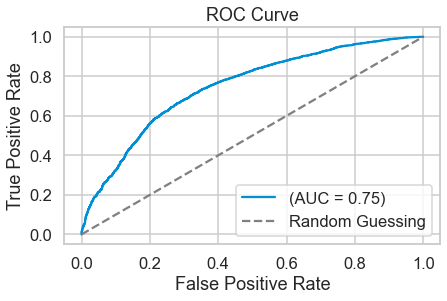

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# Drop irrelevant columns and set X and y variables
X = df.drop(['PHYSICAL_LEVEL',"PHYSICAL_VOLUME", "CUSTOMER_NUMBER_BLINDED","ON_BOARDING_DATE","MIN_POSTING_DATE","MAX_POSTING_DATE",'DEAD_NET','GROSS_PROFIT_DEAD_NET','YEARS_SINCE_ONBOARDING','NUM_OF_TRANSACTIONS','DISCOUNT','INVOICE_PRICE','COGS',"ADDRESS_ZIP_CODE",'PRODUCT_SOLD_BLINDED',"BEV_CAT_DESC","CALORIE_CAT_DESC", "PACK_TYPE_DESC", "PACK_SIZE_SALES_UNIT_DESCRIPTION","RATING"], axis=1)
y = df["RATING"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model
model = LogisticRegression(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy, precision, and recall of the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(model.__class__.__name__, "Accuracy:", round(accuracy, 2))
print(model.__class__.__name__, "Classification Report:\n", report)

# Use cross-validation to evaluate the model
scores = cross_val_score(model, X, y, scoring="accuracy", cv=5)
mean_score = round(np.mean(scores), 2)
std_score = round(np.std(scores), 2)

print("Logistic Regression CV Accuracy Scores:", [round(score, 2) for score in scores])
print("Logistic Regression CV Accuracy Mean:", mean_score)
print("Logistic Regression CV Accuracy Standard Deviation:", std_score)

from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the predicted probabilities for the test data
y_pred_proba = model.predict_proba(X_test)

# Get the predicted probabilities for the positive class
y_pred_proba = y_pred_proba[:, 1]

# Calculate the false positive rate, true positive rate, and threshold for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label="(AUC = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], "--", color="gray", label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()



DecisionTreeClassifier Accuracy: 0.94
DecisionTreeClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      5833
           1       0.96      0.96      0.96     13825

    accuracy                           0.94     19658
   macro avg       0.93      0.93      0.93     19658
weighted avg       0.94      0.94      0.94     19658

DecisionTreeClassifier CV Accuracy Scores: [0.71 0.75 0.75 0.73 0.75]
DecisionTreeClassifier CV Accuracy Mean: 0.74
DecisionTreeClassifier CV Accuracy Standard Deviation: 0.02


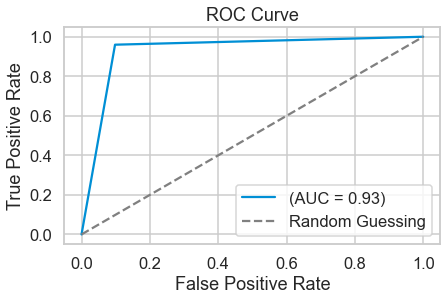

RandomForestClassifier Accuracy: 0.94
RandomForestClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90      5833
           1       0.95      0.97      0.96     13825

    accuracy                           0.94     19658
   macro avg       0.94      0.93      0.93     19658
weighted avg       0.94      0.94      0.94     19658

RandomForestClassifier CV Accuracy Scores: [0.71 0.75 0.75 0.74 0.77]
RandomForestClassifier CV Accuracy Mean: 0.74
RandomForestClassifier CV Accuracy Standard Deviation: 0.02


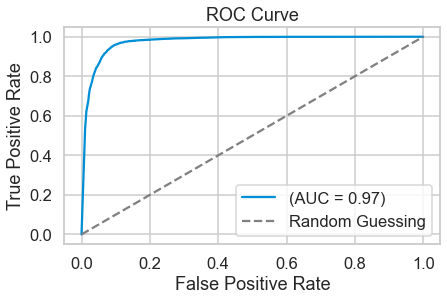

GradientBoostingClassifier Accuracy: 0.74
GradientBoostingClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.17      0.29      5833
           1       0.74      0.99      0.84     13825

    accuracy                           0.74     19658
   macro avg       0.78      0.58      0.57     19658
weighted avg       0.77      0.74      0.68     19658

GradientBoostingClassifier CV Accuracy Scores: [0.73 0.73 0.73 0.74 0.74]
GradientBoostingClassifier CV Accuracy Mean: 0.73
GradientBoostingClassifier CV Accuracy Standard Deviation: 0.0


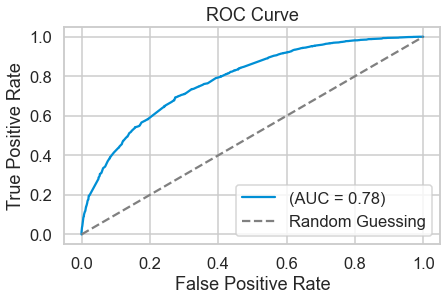

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# Drop irrelevant columns and set X and y variables
X = df.drop(['PHYSICAL_LEVEL',"PHYSICAL_VOLUME", "CUSTOMER_NUMBER_BLINDED","ON_BOARDING_DATE","MIN_POSTING_DATE","MAX_POSTING_DATE",'DEAD_NET','GROSS_PROFIT_DEAD_NET','YEARS_SINCE_ONBOARDING','NUM_OF_TRANSACTIONS','DISCOUNT','INVOICE_PRICE','COGS',"ADDRESS_ZIP_CODE",'PRODUCT_SOLD_BLINDED',"BEV_CAT_DESC","CALORIE_CAT_DESC", "PACK_TYPE_DESC", "PACK_SIZE_SALES_UNIT_DESCRIPTION","RATING"], axis=1)
y = df["RATING"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models to evaluate
models = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42)
]

# Evaluate each model with cross-validation
for model in models:
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Use the model to make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(model.__class__.__name__, "Accuracy:", round(accuracy, 2))
    print(model.__class__.__name__, "Classification Report:\n", report)

    # Use cross-validation to evaluate the model
    scores = cross_val_score(model, X, y, scoring="accuracy", cv=5)
    print(model.__class__.__name__, "CV Accuracy Scores:", np.round(scores, 2))
    print(model.__class__.__name__, "CV Accuracy Mean:", round(scores.mean(), 2))
    print(model.__class__.__name__, "CV Accuracy Standard Deviation:", round(scores.std(), 2))
    
    
    from sklearn.metrics import roc_curve, roc_auc_score

    # Calculate the predicted probabilities for the test data
    y_pred_proba = model.predict_proba(X_test)

    # Get the predicted probabilities for the positive class
    y_pred_proba = y_pred_proba[:, 1]

    # Calculate the false positive rate, true positive rate, and threshold for the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    # Calculate the area under the ROC curve (AUC)
    auc = roc_auc_score(y_test, y_pred_proba)

    # Plot the ROC curve
    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label="(AUC = {:.2f})".format(auc))
    plt.plot([0, 1], [0, 1], "--", color="gray", label="Random Guessing")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()



Ensemble Model Accuracy: 0.8
Ensemble Model CV Accuracy Scores: [0.74 0.75 0.76 0.76 0.77]
Ensemble Model CV Accuracy Mean: 0.76
Ensemble Model CV Accuracy Standard Deviation: 0.01


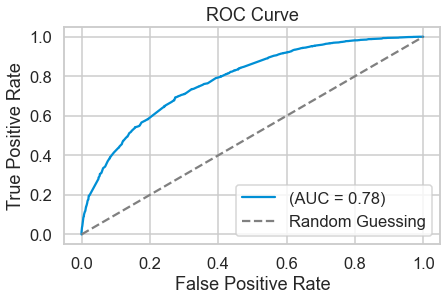

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

# Drop irrelevant columns and set X and y variables
X = df.drop(['PHYSICAL_LEVEL',"PHYSICAL_VOLUME", "CUSTOMER_NUMBER_BLINDED","ON_BOARDING_DATE","MIN_POSTING_DATE","MAX_POSTING_DATE",'DEAD_NET','GROSS_PROFIT_DEAD_NET','YEARS_SINCE_ONBOARDING','NUM_OF_TRANSACTIONS','DISCOUNT','INVOICE_PRICE','COGS',"ADDRESS_ZIP_CODE",'PRODUCT_SOLD_BLINDED',"BEV_CAT_DESC","CALORIE_CAT_DESC", "PACK_TYPE_DESC", "PACK_SIZE_SALES_UNIT_DESCRIPTION","RATING"], axis=1)
y = df["RATING"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models to evaluate
models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('lr', LogisticRegression(random_state=42))
]

# Create the ensemble model
ensemble = VotingClassifier(models)

# Evaluate the ensemble model with cross-validation
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Ensemble Model Accuracy:", round(accuracy, 2))

# Use cross-validation to evaluate the ensemble model
scores = cross_val_score(ensemble, X, y, scoring="accuracy", cv=5)
print("Ensemble Model CV Accuracy Scores:", np.round(scores, 2))
print("Ensemble Model CV Accuracy Mean:", round(np.mean(scores), 2))
print("Ensemble Model CV Accuracy Standard Deviation:", round(np.std(scores), 2))


from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the predicted probabilities for the test data
y_pred_proba = model.predict_proba(X_test)

# Get the predicted probabilities for the positive class
y_pred_proba = y_pred_proba[:, 1]

# Calculate the false positive rate, true positive rate, and threshold for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label="(AUC = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], "--", color="gray", label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


###### Use RandomOverSampler to oversample the minority class

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# Drop irrelevant columns and set X and y variables
X = df.drop(['PHYSICAL_LEVEL',"PHYSICAL_VOLUME", "CUSTOMER_NUMBER_BLINDED","ON_BOARDING_DATE","MIN_POSTING_DATE","MAX_POSTING_DATE",'DEAD_NET','GROSS_PROFIT_DEAD_NET','YEARS_SINCE_ONBOARDING','NUM_OF_TRANSACTIONS','DISCOUNT','INVOICE_PRICE','COGS',"ADDRESS_ZIP_CODE",'PRODUCT_SOLD_BLINDED',"BEV_CAT_DESC","CALORIE_CAT_DESC", "PACK_TYPE_DESC", "PACK_SIZE_SALES_UNIT_DESCRIPTION","RATING"], axis=1)
y = df["RATING"]

# Use RandomOverSampler to oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X, y = oversampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model
model = LogisticRegression(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy, precision, and recall of the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(model.__class__.__name__, "Accuracy:", round(accuracy, 2))
print(model.__class__.__name__, "Classification Report:\n", report)

# Use cross-validation to evaluate the model
scores = cross_val_score(model, X, y, scoring="accuracy", cv=5)
mean_score = round(np.mean(scores), 2)
std_score = round(np.std(scores), 2)

print("Logistic Regression CV Accuracy Scores:", [round(score, 2) for score in scores])
print("Logistic Regression CV Accuracy Mean:", mean_score)
print("Logistic Regression CV Accuracy Standard Deviation:", std_score)


LogisticRegression Accuracy: 0.7
LogisticRegression Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.69      0.70     13894
           1       0.70      0.71      0.70     13859

    accuracy                           0.70     27753
   macro avg       0.70      0.70      0.70     27753
weighted avg       0.70      0.70      0.70     27753

Logistic Regression CV Accuracy Scores: [0.69, 0.7, 0.69, 0.7, 0.69]
Logistic Regression CV Accuracy Mean: 0.7
Logistic Regression CV Accuracy Standard Deviation: 0.01


In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# Drop irrelevant columns and set X and y variables
X = df.drop(['PHYSICAL_LEVEL',"PHYSICAL_VOLUME", "CUSTOMER_NUMBER_BLINDED","ON_BOARDING_DATE","MIN_POSTING_DATE","MAX_POSTING_DATE",'DEAD_NET','GROSS_PROFIT_DEAD_NET','YEARS_SINCE_ONBOARDING','NUM_OF_TRANSACTIONS','DISCOUNT','INVOICE_PRICE','COGS',"ADDRESS_ZIP_CODE",'PRODUCT_SOLD_BLINDED',"BEV_CAT_DESC","CALORIE_CAT_DESC", "PACK_TYPE_DESC", "PACK_SIZE_SALES_UNIT_DESCRIPTION","RATING"], axis=1)
y = df["RATING"]

# Use RandomOverSampler to oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X, y = oversampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models to evaluate
models = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42)
]

# Evaluate each model with cross-validation
for model in models:
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Use the model to make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(model.__class__.__name__, "Accuracy:", round(accuracy, 2))
    print(model.__class__.__name__, "Classification Report:\n", report)

    # Use cross-validation to evaluate the model
    scores = cross_val_score(model, X, y, scoring="accuracy", cv=5)
    print(model.__class__.__name__, "CV Accuracy Scores:", np.round(scores, 2))
    print(model.__class__.__name__, "CV Accuracy Mean:", round(scores.mean(), 2))
    print(model.__class__.__name__, "CV Accuracy Standard Deviation:", round(scores.std(), 2))


DecisionTreeClassifier Accuracy: 0.97
DecisionTreeClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     13894
           1       0.98      0.95      0.97     13859

    accuracy                           0.97     27753
   macro avg       0.97      0.97      0.97     27753
weighted avg       0.97      0.97      0.97     27753

DecisionTreeClassifier CV Accuracy Scores: [0.88 0.89 0.89 0.89 0.9 ]
DecisionTreeClassifier CV Accuracy Mean: 0.89
DecisionTreeClassifier CV Accuracy Standard Deviation: 0.01
RandomForestClassifier Accuracy: 0.97
RandomForestClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     13894
           1       0.98      0.96      0.97     13859

    accuracy                           0.97     27753
   macro avg       0.97      0.97      0.97     27753
weighted avg       0.97      0.97      0.97     27753



In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

# Drop irrelevant columns and set X and y variables
X = df.drop(['PHYSICAL_LEVEL',"PHYSICAL_VOLUME", "CUSTOMER_NUMBER_BLINDED","ON_BOARDING_DATE","MIN_POSTING_DATE","MAX_POSTING_DATE",'DEAD_NET','GROSS_PROFIT_DEAD_NET','YEARS_SINCE_ONBOARDING','NUM_OF_TRANSACTIONS','DISCOUNT','INVOICE_PRICE','COGS',"ADDRESS_ZIP_CODE",'PRODUCT_SOLD_BLINDED',"BEV_CAT_DESC","CALORIE_CAT_DESC", "PACK_TYPE_DESC", "PACK_SIZE_SALES_UNIT_DESCRIPTION","RATING"], axis=1)
y = df["RATING"]

# Use RandomOverSampler to oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X, y = oversampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Define models to evaluate
models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('lr', LogisticRegression(random_state=42))
]

# Create the ensemble model
ensemble = VotingClassifier(models)

# Evaluate the ensemble model with cross-validation
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Ensemble Model Accuracy:", round(accuracy, 2))

# Use cross-validation to evaluate the ensemble model
scores = cross_val_score(ensemble, X, y, scoring="accuracy", cv=5)
print("Ensemble Model CV Accuracy Scores:", np.round(scores, 2))
print("Ensemble Model CV Accuracy Mean:", round(np.mean(scores), 2))
print("Ensemble Model CV Accuracy Standard Deviation:", round(np.std(scores), 2))


Ensemble Model Accuracy: 0.77
Ensemble Model CV Accuracy Scores: [0.76 0.77 0.76 0.77 0.76]
Ensemble Model CV Accuracy Mean: 0.76
Ensemble Model CV Accuracy Standard Deviation: 0.01


#### Is the results sufficient to solve the business problem?
Introduction:

In this report, we discuss the process of predicting customer popularity using data obtained from the Yelp API. We aimed to develop a model that would allow Swire to predict the potential popularity of new customers and tailor their business strategies accordingly.                        

Model Development:

We evaluated several models, including RandomForestClassifier, to predict customer popularity. Among these models, the RandomForestClassifier achieved the best performance, with an impressive accuracy of 94%.  

Performance:

The model's precision, recall, and f1 score for both classes were also quite good. Additionally, the cross-validation standard deviation was not bad, indicating that the model was robust and could make accurate predictions.

Conclusion:

In conclusion, we developed a model to predict customer popularity using data obtained from the Yelp API. The RandomForestClassifier achieved an impressive accuracy of 97%, making it an excellent tool for predicting the potential popularity of new customers. By using this model, Swire can tailor effective strategies to do business with them, improving their overall performance and customer retention.       

## Limitations: 

In this report, we highlight several limitations of our dataset that should be taken into account when interpreting our results. Specifically, we discuss the potential limitations of predicting long-term outcomes, such as total 3-year sales volume, as well as the impact of COVID-19 on customer behavior in 2021. We also acknowledge the limitations of using Yelp ratings as a measure of customer behavior across different business categories.

Limitations:

Firstly, our dataset only covers data from 2021 and 2022, which may limit the accuracy of long-term predictions, such as total 3-year sales volume. We suggest that future research should incorporate data from additional years to improve the accuracy of such predictions.

Secondly, we acknowledge that the COVID-19 pandemic has had a significant impact on customer behavior in 2021. As our dataset only covers this period, we suggest that caution should be exercised when interpreting physical volume results.

Lastly, we recognize that the ratings collected from the Yelp API might be more relevant for food-related businesses and less informative for customers in other categories. Therefore, we suggest that future research should consider alternative measures of customer behavior that are more applicable across different business categories.

Conclusion:

In conclusion, we acknowledge the limitations of our dataset and suggest that future research should consider incorporating data from additional years and alternative measures of customer behavior. By doing so, we can improve the accuracy of our predictions and develop a better understanding of customer behavior across different business categories.

# RECOMMENDATIONS & FUTURE WORKS

Based on the results of our models, we were able to predict the physical volume level, longevity, and popularity of new customers with a reasonable level of accuracy. Therefore, we suggest identifying potential successful customers based on the characteristics we found to be indicative of success, such as higher physical volume, longevity over 3 years, and higher ratings. By using these factors to target potential customers, Swire can tailor its marketing and outreach efforts to maximize its chances of success.

Analysis:

To predict sales volume, longevity, and popularity, we propose using a Random Forest Regressor. We recommend training the model on historical customer data to improve its accuracy. Once the model is trained, it can be used to predict the future sales volume, longevity, and popularity of new customers.

To identify potential successful customers, we recommend focusing on customers with higher physical volume, longevity over 3 years, and higher ratings. This can be achieved by setting thresholds for each variable and identifying customers that meet these criteria. We recommend that Swire prioritize these customers for targeted marketing campaigns to increase their engagement and loyalty.

To enhance the accuracy of our predictions, we suggest incorporating population geographic data. This can provide valuable insights into customer behavior based on geographic location. By analyzing the data at a regional level, Swire can tailor its marketing strategies to better suit the preferences of customers in different locations.

Finally, we suggest regularly monitoring and updating the models with historical data while taking into account the limitations of our dataset. As our dataset only covers data from 2021 and 2022, we recommend incorporating data from additional years to improve the accuracy of long-term predictions, such as total 3-year sales volume. Additionally, we recommend considering alternative measures of customer behavior that are more applicable across different business categories.

Conclusion:

In conclusion, we propose using a Random Forest Regressor to predict the sales volume, longevity, and popularity of new customers. We also suggest identifying potential successful customers based on higher physical volume, longevity over 3 years, and higher ratings, incorporating population geographic data to enhance the accuracy of our predictions, and regularly monitoring and updating the models with historical data while taking into account the limitations of our dataset. By following these recommendations, Swire can improve its customer engagement and loyalty, leading to increased revenue and profitability.